# 데이터프레임 생성

### 유지고객 데이터 불러오기

In [17]:
import pandas as pd

cust_유지 = pd.read_csv('C:/cakd7/2차 프로젝트/purchase_유지.csv', index_col = 0)
cust_유지

,CUSTNO,ASSO,RNO,BBCL,BCL,MCL,SCL,TYPE,PURYEAR,HALF_YEAR,QUARTER,PRICE_TYPE,PURAMT,Q_year
0,17485,B,8919510,식품/생활,식품,샐러드채소,양상추,일용품,2015,4,3,저가,2000,2015_3
1,17485,B,8919510,식품/생활,식품,김치채소,무우,일용품,2015,4,3,저가,1250,2015_3
2,17485,B,8919510,식품/생활,식품,일반한우,한우양지,일용품,2015,4,3,고가,23790,2015_3
3,17485,B,8919510,식품/생활,식품,포도,캠벨포도,일용품,2015,4,3,중가,25600,2015_3
4,17485,B,8919510,식품/생활,식품,메론,머스크메론,일용품,2015,4,3,중가,12800,2015_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593024,16515,B,7784996,식품/생활,식품,족발,즉석족발,일용품,2014,1,2,중가,4979,2014_2
28593025,5786,B,7784894,식품/생활,식품,스낵,일반스낵,일용품,2014,1,2,중가,490,2014_2
28593026,14026,B,7784900,식품/생활,식품,족발,냉장족발,일용품,2014,1,2,중가,4000,2014_2
28593027,16612,C,9500419,식품/생활,식품,기타축산,돼지양념육,일용품,2014,2,3,중가,7900,2014_3


In [69]:
len(cust_유지['RNO'].unique())

10920826

#### 유지고객 인덱스 추출

In [11]:
cust_idx = cust_유지['CUSTNO'].unique()
cust_idx

array([17485, 12960, 15693, ..., 17252,  1074, 17017], dtype=int64)

In [19]:
cust_유지['PRICE_TYPE'].unique()

array(['저가', '고가', '중가'], dtype=object)

### (오류)고객 구매데이터 원본 불러오기

In [2]:
purchase = pd.read_csv('C:/cakd7/2차 프로젝트/raw_data/구매상품TR.txt', sep = ',', encoding = 'cp949')
purchase

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120
...,...,...,...,...,...,...,...,...,...,...
28593025,B,8116737,37,3709,B370904,7439,29,20150525,19,14000
28593026,B,8116738,37,3709,B370904,16421,29,20150525,20,6500
28593027,B,8116739,8,802,B080203,8266,29,20150525,13,16000
28593028,B,8116764,90,9001,B900103,14316,29,20150526,19,1000


#### 유지고객 관련 원본 데이터 불러오기

In [4]:
cust_유지_purchase = purchase[purchase['고객번호'].isin(cust_idx)]
cust_유지_purchase

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120
...,...,...,...,...,...,...,...,...,...,...
28593025,B,8116737,37,3709,B370904,7439,29,20150525,19,14000
28593026,B,8116738,37,3709,B370904,16421,29,20150525,20,6500
28593027,B,8116739,8,802,B080203,8266,29,20150525,13,16000
28593028,B,8116764,90,9001,B900103,14316,29,20150526,19,1000


#### 구매일자 데이터 merge

In [9]:
# merge를 위한 컬럼만 추출
for_merge = cust_유지_purchase[['제휴사','고객번호','구매일자','영수증번호']]

# merge on 요소가 되기위해 컬럼이름 변경
for_merge.rename(columns = {'제휴사': 'ASSO',
                            '고객번호' : 'CUSTNO',
                            '구매일자': 'PURDATE',
                            '영수증번호': 'RNO'}, inplace = True)

C:\Users\NEW\AppData\Local\Temp\ipykernel_17064\2172041884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_merge.rename(columns = {'제휴사': 'ASSO',


In [12]:
# merge
cust_유지_merge = pd.merge(cust_유지_purchase, cust_유지, how = 'outer')
cust_유지_merge

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

### merge_purchase 불러오기

In [1]:
import pandas as pd

merge_pro = pd.read_csv('C:/cakd7/2차 프로젝트/merge_purchase.csv', index_col = 0)
merge_pro

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,구매연도,구매월,구매일,구매 분기,구매 계절,CATEGORY,중분류명,소분류명,TYPE
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420,2014,2,22,1,겨울,식품,탄산음료,사이다,일용품
1,B,8664007,15,1504,B150401,11303,44,20140222,13,2400,2014,2,22,1,겨울,식품,탄산음료,사이다,일용품
2,B,8919520,15,1504,B150401,13210,48,20150921,19,5250,2015,9,21,3,가을,식품,탄산음료,사이다,일용품
3,B,6956422,15,1504,B150401,13823,12,20140813,18,2250,2014,8,13,3,여름,식품,탄산음료,사이다,일용품
4,B,6957156,15,1504,B150401,18970,12,20140831,22,4900,2014,8,31,3,여름,식품,탄산음료,사이다,일용품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,7269975,14,1415,B141503,134,16,20141130,15,8900,2014,11,30,4,가을,식품,전통과자,온라인팥빙수재료,일용품
28593026,B,7946814,68,6802,B680209,18484,26,20141227,14,1000,2014,12,27,4,겨울,잡화,여성양말,여성발가락,일용품
28593027,B,7777110,7,702,B070203,5043,21,20151012,22,4510,2015,10,12,4,가을,식품,즉석구이안주,즉석쥐포,일용품
28593028,B,7579178,7,703,B070305,4073,18,20140125,20,8900,2014,1,25,1,겨울,식품,마른안주,온라인 안주,일용품


CUSTNO	ASSO	RNO	BBCL	BCL	MCL	SCL	TYPE	PURYEAR	HALF_YEAR	QUARTER	PRICE_TYPE	PURAMT

In [2]:
merge_pro.columns

Index(['제휴사', '영수증번호', '대분류코드', '중분류코드', '소분류코드', '고객번호', '점포코드', '구매일자',
       '구매시간', '구매금액', '구매연도', '구매월', '구매일', '구매 분기', '구매 계절', 'CATEGORY',
       '중분류명', '소분류명', 'TYPE'],
      dtype='object')

In [15]:
pro_need = merge_pro[['고객번호','제휴사','점포코드','영수증번호','CATEGORY','중분류명','소분류명','TYPE','구매일자',
                       '구매연도','구매 분기','구매월','구매시간','구매금액']]
pro_need = pro_need.rename(columns = {'고객번호': 'CUSTNO',
                                       '제휴사':'ASSO',
                                       '점포코드':'STCODE',
                                       '영수증번호':'RNO',
                                       'CATEGORY':'BCL',
                                       '중분류명':'MCL',
                                       '소분류명':'SCL',
                                       '구매일자':'PURDATE',
                                       '구매연도':'PURYEAR',
                                       '구매 분기':'QUARTER',
                                       '구매월': 'PURMONTH',
                                       '구매시간':'PURHOUR',
                                       '구매금액': 'PURAMT'})

pro_need.head()

,CUSTNO,ASSO,STCODE,RNO,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT
0,17218,B,44,8664000,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420
1,11303,B,44,8664007,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400
2,13210,B,48,8919520,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250
3,13823,B,12,6956422,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250
4,18970,B,12,6957156,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900


#### BBCL 컬럼 생성

In [5]:
pro_need['BCL'].unique()

array(['식품', '생활', '침구', '교육문화', '이미용', '주방', '잡화', '의류', '레저취미', '아동',
       '가전', '가구인테리어', '멀티샵'], dtype=object)

In [6]:
pro_need.columns

Index(['CUSTNO', 'ASSO', 'STCODE', 'RNO', 'BCL', 'MCL', 'SCL', 'TYPE',
       'PURDATE', 'PURYEAR', 'QUARTER', 'PURMONTH', 'PURHOUR'],
      dtype='object')

생활 - 식품/ 
가구인테리어 - 잡화/ 
교육문화 - 아동/ 
가전 - 레저취미 - 멀티샵/ 
의류 - 이미용 / 
침구 - 주방  
(총 6개의 대분류)

In [16]:
def bbcl_cate(x):
    if x in ('식품','생활'): y = '식품/생활'
    elif x in ('가구인테리어','잡화'): y = '가구인테리어/잡화'
    elif x in ('교육문화','아동'): y = '교육문화/아동'
    elif x in ('가전','레저취미','멀티샵'): y = '가전/레저취미/멀티샵'
    elif x in ('의류','이미용'): y = '의류/이미용'
    elif x in ('침구','주방'): y = '침구/주방'
    return y
        
pro_need['BBCL'] = pro_need['BCL'].apply(lambda x: bbcl_cate(x))
pro_need = pro_need[['CUSTNO', 'ASSO', 'STCODE', 'RNO', 'BBCL', 'BCL', 'MCL', 'SCL', 'TYPE',
       'PURDATE', 'PURYEAR', 'QUARTER', 'PURMONTH', 'PURHOUR','PURAMT']]

pro_need.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900


#### 유지고객만 추출

In [14]:
cust_유지.head()

,CUSTNO,ASSO,RNO,BBCL,BCL,MCL,SCL,TYPE,PURYEAR,HALF_YEAR,QUARTER,PRICE_TYPE,PURAMT,Q_year
0,17485,B,8919510,식품/생활,식품,샐러드채소,양상추,일용품,2015,4,3,저가,2000,2015_3
1,17485,B,8919510,식품/생활,식품,김치채소,무우,일용품,2015,4,3,저가,1250,2015_3
2,17485,B,8919510,식품/생활,식품,일반한우,한우양지,일용품,2015,4,3,고가,23790,2015_3
3,17485,B,8919510,식품/생활,식품,포도,캠벨포도,일용품,2015,4,3,중가,25600,2015_3
4,17485,B,8919510,식품/생활,식품,메론,머스크메론,일용품,2015,4,3,중가,12800,2015_3


In [17]:
custno_유지_연도포함 = pro_need[pro_need['CUSTNO'].isin(cust_idx)]
custno_유지_연도포함

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,134,B,16,7269975,식품/생활,식품,전통과자,온라인팥빙수재료,일용품,20141130,2014,4,11,15,8900
28593026,18484,B,26,7946814,가구인테리어/잡화,잡화,여성양말,여성발가락,일용품,20141227,2014,4,12,14,1000
28593027,5043,B,21,7777110,식품/생활,식품,즉석구이안주,즉석쥐포,일용품,20151012,2015,4,10,22,4510
28593028,4073,B,18,7579178,식품/생활,식품,마른안주,온라인 안주,일용품,20140125,2014,1,1,20,8900


In [18]:
custno_유지_연도포함.to_csv('C:/cakd7/2차 프로젝트/purchase_유지_연도포함.csv')

## 유지고객_연도포함 데이터 불러오기

In [ ]:
import pandas as pd

purchase = pd.read_csv('C:/cakd7/2차 프로젝트/purchase_유지_연도포함.csv', index_col = 0)
purchase

### 금액 타입 merge

In [2]:
price_type = pd.read_csv('C:/cakd7/2차 프로젝트/분류로직_수정.csv', encoding = 'cp949')
price_type = price_type[['제휴사','대분류명','중분류명','금액 타입']]
price_type = price_type.rename(columns = {'제휴사': 'ASSO',
                                         '대분류명': 'BCL',
                                         '중분류명': 'MCL',
                                         '금액 타입': 'PRICE_TYPE'})
price_type

,ASSO,BCL,MCL,PRICE_TYPE
0,A,식품,가공식품,중가
1,A,식품,건강식품,고가
2,A,멀티샵,기타,중가
3,A,식품,농산물,중가
4,A,식품,수산품,고가
...,...,...,...,...
801,D,이미용,여성,중가
802,D,이미용,네일메이크업,저가
803,D,이미용,립메이크업,저가
804,D,이미용,베이스메이크업,저가


In [3]:
price_type.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
801    False
802    False
803    False
804    False
805    False
Length: 806, dtype: bool

In [27]:
price_type['PRICE_TYPE'].unique()

array(['중가', '고가', '저가'], dtype=object)

#### 금액타입 컬럼 생성

In [4]:
import numpy as np

purchase['PRICE_TYPE'] = np.nan
purchase.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,NaN
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,NaN
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250,NaN
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250,NaN
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900,NaN


In [5]:
purchase.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,NaN
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,NaN
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250,NaN
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250,NaN
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900,NaN


In [6]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28255868 entries, 0 to 28593029
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CUSTNO      int64  
 1   ASSO        object 
 2   STCODE      int64  
 3   RNO         int64  
 4   BBCL        object 
 5   BCL         object 
 6   MCL         object 
 7   SCL         object 
 8   TYPE        object 
 9   PURDATE     int64  
 10  PURYEAR     int64  
 11  QUARTER     int64  
 12  PURMONTH    int64  
 13  PURHOUR     int64  
 14  PURAMT      int64  
 15  PRICE_TYPE  float64
dtypes: float64(1), int64(9), object(6)
memory usage: 3.6+ GB


In [7]:
purchase['PRICE_TYPE'] = purchase['PRICE_TYPE'].astype(str)

In [8]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28255868 entries, 0 to 28593029
Data columns (total 16 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CUSTNO      int64 
 1   ASSO        object
 2   STCODE      int64 
 3   RNO         int64 
 4   BBCL        object
 5   BCL         object
 6   MCL         object
 7   SCL         object
 8   TYPE        object
 9   PURDATE     int64 
 10  PURYEAR     int64 
 11  QUARTER     int64 
 12  PURMONTH    int64 
 13  PURHOUR     int64 
 14  PURAMT      int64 
 15  PRICE_TYPE  object
dtypes: int64(9), object(7)
memory usage: 3.6+ GB


In [9]:
import numpy as np

for asso, bcl, mcl, types in np.array(price_type):
    try:
        purchase.loc[(purchase['ASSO'] == asso)&(purchase['BCL'] == bcl)&(purchase['MCL'] == mcl),'PRICE_TYPE'] = types
    except:
        pass
        
purchase

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250,중가
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250,중가
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900,중가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,134,B,16,7269975,식품/생활,식품,전통과자,온라인팥빙수재료,일용품,20141130,2014,4,11,15,8900,저가
28593026,18484,B,26,7946814,가구인테리어/잡화,잡화,여성양말,여성발가락,일용품,20141227,2014,4,12,14,1000,저가
28593027,5043,B,21,7777110,식품/생활,식품,즉석구이안주,즉석쥐포,일용품,20151012,2015,4,10,22,4510,중가
28593028,4073,B,18,7579178,식품/생활,식품,마른안주,온라인 안주,일용품,20140125,2014,1,1,20,8900,중가


#### NULL값 확인

In [22]:
purchase.isnull().sum()

CUSTNO        0
ASSO          0
STCODE        0
RNO           0
BBCL          0
BCL           0
MCL           0
SCL           0
TYPE          0
PURDATE       0
PURYEAR       0
QUARTER       0
PURMONTH      0
PURHOUR       0
PURAMT        0
PRICE_TYPE    0
dtype: int64

In [32]:
price_type[price_type['MCL']=='란제리/내의']

,ASSO,BCL,MCL,PRICE_TYPE
21,A,속옷,란제리/내의,고가


In [29]:
purchase[purchase['PRICE_TYPE'] == 'nan'][['ASSO','BCL','MCL']].value_counts()

ASSO  BCL  MCL   
A     의류   란제리/내의    56913
B     의류   성인내의      28737
           란제리브랜드    22378
           란제리       19859
           스타킹       12752
           아동내의       9511
           언더웨어행사     7556
           덧신         5547
           홈웨어        3680
A     의류   웨딩            3
dtype: int64

In [24]:
purchase.PRICE_TYPE.unique()

array(['중가', '저가', '고가', 'nan'], dtype=object)

#### NULL값 채우기

In [33]:
purchase_final = purchase.copy()
purchase_final.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250,중가
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250,중가
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900,중가


In [34]:
null_idx = purchase[purchase['PRICE_TYPE'] == 'nan'].index
null_idx

Int64Index([ 2896096,  2896097,  2896098,  2896099,  2896100,  2896101,
             2896102,  2896103,  2896104,  2896105,
            ...
            28592218, 28592219, 28592220, 28592221, 28592222, 28592223,
            28592224, 28592831, 28592970, 28592994],
           dtype='int64', length=166936)

In [66]:
purchase_final.loc[idx]

CUSTNO            9188
ASSO                 B
STCODE               7
RNO            6493374
BBCL            의류/이미용
BCL                 의류
MCL                홈웨어
SCL               여성잠옷
TYPE               일용품
PURDATE       20140925
PURYEAR           2014
QUARTER              3
PURMONTH             9
PURHOUR             20
PURAMT           25900
PRICE_TYPE          저가
Name: 28592994, dtype: object

In [67]:
null_idx = purchase[purchase['PRICE_TYPE'] == 'nan'].index
null_idx

for idx in null_idx:
    if purchase_final.loc[idx]['ASSO'] == 'A' and purchase_final.loc[idx]['MCL'] == '란제리/내의':
        purchase_final.loc[idx,'PRICE_TYPE'] = '고가'
    elif purchase_final.loc[idx]['ASSO'] == 'A' and purchase_final.loc[idx]['MCL'] == '웨딩':
        purchase_final.loc[idx,'PRICE_TYPE'] = '중가'
    elif purchase_final.loc[idx]['ASSO'] == 'B' and purchase_final.loc[idx]['MCL'] in ('성인내의','란제리','스타킹','아동내의','언더웨어행사', '덧신','홈웨어'):
        purchase_final.loc[idx,'PRICE_TYPE'] = '저가'
    elif purchase_final.loc[idx]['ASSO'] == 'B' and purchase_final.loc[idx]['MCL'] == '란제리브랜드':
        purchase_final.loc[idx,'PRICE_TYPE'] = '중가'

In [69]:
purchase_final.PRICE_TYPE.unique()

array(['중가', '저가', '고가', 'nan'], dtype=object)

In [71]:
purchase_final[purchase_final['PRICE_TYPE'] == 'nan']['MCL'].unique()

array(['란제리브랜드'], dtype=object)

In [73]:
null_idx2 = purchase_final[purchase_final['PRICE_TYPE'] == 'nan'].index
null_idx2

Int64Index([26082524, 26082525, 26082526, 26082527, 26082528, 26082529,
            26082530, 26082531, 26082532, 26082533,
            ...
            28447095, 28447096, 28447097, 28447098, 28447099, 28447100,
            28447101, 28447102, 28447103, 28447104],
           dtype='int64', length=22378)

In [74]:
for idx in null_idx2:
    if purchase_final.loc[idx]['ASSO'] == 'B' and purchase_final.loc[idx]['MCL'] == '란제리브랜드':
        purchase_final.loc[idx,'PRICE_TYPE'] = '중가'

In [75]:
purchase_final.PRICE_TYPE.unique()

array(['중가', '저가', '고가'], dtype=object)

#### 저장하기

In [77]:
purchase_final.to_csv('C:/cakd7/2차 프로젝트/purchase_유지_연도 및 금액타입 포함.csv')

# (최종) 데이터 불러오기

In [ ]:
purchase_final = pd.read_csv('C:/cakd7/2차 프로젝트/purchase_유지_연도 및 금액타입 포함.csv', index_col = 0)
purchase_final

# RMF
- Recency: 해당 구매 기간 내 최근 구매일
- Monetary: 해당 구매 기간 내 구매 금액
- Frequency: 해당 구매 기간 내 구매 횟수

In [80]:
recency_all = pd.pivot_table(data = purchase_final,
                             index = 'CUSTNO',
                             columns = ['PURYEAR','QUARTER','BBCL','PRICE_TYPE'],
                             values = ['PURDATE','PURAMT'],
                             aggfunc = {'PURDATE':['max', 'count'],
                                        'PURAMT': 'sum'})
recency_all

PURAMT                                                     \
                 sum                                                      
PURYEAR         2014                                                      
QUARTER            1                                                      
BBCL       가구인테리어/잡화                     가전/레저취미/멀티샵                      
PRICE_TYPE        고가        저가        중가          고가       저가        중가   
CUSTNO                                                                    
1                NaN  390800.0       NaN    641250.0      NaN   65550.0   
2                NaN  562170.0  150000.0   2194330.0  30500.0       NaN   
3                NaN     600.0       NaN         NaN      NaN       NaN   
4                NaN  191810.0  189520.0         NaN      NaN  141550.0   
6                NaN       NaN       NaN         NaN      NaN       NaN   
...              ...       ...       ...         ...      ...       ...   
19333            NaN       NaN       NaN         NaN  22000.0       NaN   
19334            NaN       NaN       NaN         NaN      NaN       NaN   
19335            NaN   25000.0       NaN         NaN      NaN       NaN   
19336            NaN       NaN       NaN         NaN      NaN  387000.0   
19337            NaN       NaN       NaN         NaN      NaN       NaN   

                                                   ...     PURDATE  \
                                                   ...         max   
PURYEAR                                            ...        2015   
QUARTER                                            ...           4   
BBCL        교육문화/아동                         식품/생활  ...     교육문화/아동   
PRICE_TYPE       고가       저가        중가         고가  ...          중가   
CUSTNO                                             ...               
1               NaN      NaN  103740.0  1027500.0  ...         NaN   
2               NaN      NaN  113920.0   519290.0  ...         NaN   
3               NaN      NaN       NaN    21800.0  ...         NaN   
4               NaN      NaN       NaN     8000.0  ...         NaN   
6               NaN      NaN       NaN   265680.0  ...         NaN   
...             ...      ...       ...        ...  ...         ...   
19333           NaN   3000.0   22700.0    34440.0  ...         NaN   
19334           NaN   7000.0   11250.0        NaN  ...  20151221.0   
19335       82800.0  28400.0  103324.0    72130.0  ...  20151231.0   
19336           NaN      NaN       NaN        NaN  ...         NaN   
19337           NaN      NaN       NaN        NaN  ...         NaN   

                                                                        \
                                                                         
PURYEAR                                                                  
QUARTER                                                                  
BBCL             식품/생활                              의류/이미용               
PRICE_TYPE          고가          저가          중가          고가          저가   
CUSTNO                                                                   
1           20151230.0  20151119.0  20151230.0  20151202.0         NaN   
2           20151220.0         NaN  20151230.0  20151225.0         NaN   
3                  NaN  20151228.0  20151228.0         NaN  20151208.0   
4           20151219.0  20151223.0  20151231.0         NaN  20151212.0   
6           20151220.0  20151231.0  20151231.0  20151230.0  20151224.0   
...                ...         ...         ...         ...         ...   
19333       20151228.0  20151230.0  20151230.0         NaN         NaN   
19334       20151220.0  20151220.0  20151220.0         NaN         NaN   
19335       20151217.0  20151231.0  20151231.0         NaN  20151217.0   
19336              NaN         NaN  20151225.0  20151228.0  20151008.0   
19337       20151117.0  20151230.0  20151226.0         NaN  20151114.0   

                                                            
        

In [87]:
rmf_df.columns

MultiIndex([( 'PURAMT',   'sum',   '가구인테리어/잡화', '고가'),
            ( 'PURAMT',   'sum',   '가구인테리어/잡화', '저가'),
            ( 'PURAMT',   'sum',   '가구인테리어/잡화', '중가'),
            ( 'PURAMT',   'sum', '가전/레저취미/멀티샵', '고가'),
            ( 'PURAMT',   'sum', '가전/레저취미/멀티샵', '저가'),
            ( 'PURAMT',   'sum', '가전/레저취미/멀티샵', '중가'),
            ( 'PURAMT',   'sum',     '교육문화/아동', '고가'),
            ( 'PURAMT',   'sum',     '교육문화/아동', '저가'),
            ( 'PURAMT',   'sum',     '교육문화/아동', '중가'),
            ( 'PURAMT',   'sum',       '식품/생활', '고가'),
            ( 'PURAMT',   'sum',       '식품/생활', '저가'),
            ( 'PURAMT',   'sum',       '식품/생활', '중가'),
            ( 'PURAMT',   'sum',      '의류/이미용', '고가'),
            ( 'PURAMT',   'sum',      '의류/이미용', '저가'),
            ( 'PURAMT',   'sum',      '의류/이미용', '중가'),
            ( 'PURAMT',   'sum',       '침구/주방', '고가'),
            ( 'PURAMT',   'sum',       '침구/주방', '저가'),
            ( 'PURAMT',   'sum',       '침구/주방', '중가'),
          

### 1.원본데이터 저장

- Recency: 'PURDATE', 'max'
- Monetary: 'PURAMT', 'sum'
- Frequency:'PURDATE', 'count'

## R

#### 연습

In [147]:
rmf_df = pd.pivot_table(data = purchase_final[(purchase_final['PURYEAR'] == 2014) & (purchase_final['QUARTER'] == 2)],
                             index = 'CUSTNO',
                             columns = ['BBCL','PRICE_TYPE'],
                             values = ['PURDATE'],
                             aggfunc = ['max'])
rmf_df

max                                                  \
               PURDATE                                                   
BBCL         가구인테리어/잡화                         가전/레저취미/멀티샵               
PRICE_TYPE          고가          저가          중가          고가          저가   
CUSTNO                                                                   
1                  NaN  20140621.0  20140619.0  20140617.0         NaN   
2                  NaN  20140630.0  20140605.0  20140607.0         NaN   
3                  NaN  20140630.0         NaN         NaN         NaN   
4                  NaN  20140624.0  20140528.0  20140527.0  20140531.0   
6           20140505.0  20140604.0  20140502.0         NaN  20140625.0   
...                ...         ...         ...         ...         ...   
19333              NaN  20140603.0         NaN         NaN         NaN   
19334              NaN         NaN         NaN         NaN  20140526.0   
19335              NaN  20140623.0         NaN         NaN  20140510.0   
19336              NaN  20140608.0  20140622.0         NaN         NaN   
19337              NaN         NaN         NaN         NaN         NaN   

                                                                        \
                                                                         
BBCL                       교육문화/아동                               식품/생활   
PRICE_TYPE          중가          고가          저가          중가          고가   
CUSTNO                                                                   
1                  NaN         NaN         NaN  20140417.0  20140621.0   
2           20140525.0         NaN         NaN  20140530.0  20140630.0   
3                  NaN         NaN         NaN         NaN  20140630.0   
4           20140406.0         NaN         NaN         NaN  20140624.0   
6                  NaN         NaN         NaN         NaN  20140620.0   
...                ...         ...         ...         ...         ...   
19333              NaN         NaN         NaN  20140428.0  20140628.0   
19334              NaN         NaN  20140616.0  20140630.0  20140627.0   
19335       20140529.0  20140629.0  20140629.0  20140629.0  20140627.0   
19336       20140511.0         NaN         NaN         NaN  20140630.0   
19337              NaN         NaN         NaN         NaN         NaN   

                                                                        \
                                                                         
BBCL                                    의류/이미용                           
PRICE_TYPE          저가          중가          고가          저가          중가   
CUSTNO                                                                   
1           20140429.0  20140630.0  20140630.0         NaN  20140630.0   
2                  NaN  20140630.0  20140520.0         NaN  20140426.0   
3           20140630.0  20140630.0         NaN         NaN  20140623.0   
4           20140610.0  20140629.0  20140616.0  20140531.0  20140603.0   
6           20140630.0  20140630.0  20140626.0  20140610.0  20140626.0   
...                ...         ...         ...         ...         ...   
19333       20140621.0  20140630.0         NaN         NaN         NaN   
19334       20140629.0  20140630.0         NaN  20140624.0         NaN   
19335       20140629.0  20140629.0         NaN  20140624.0  20140623.0   
19336              NaN  20140629.0  20140608.0  20140502.0  20140628.0   
19337       20140630.0  20140630.0         NaN         NaN         NaN   

                                                
                                                
BBCL             침구/주방                          
PRICE_TYPE          고가          저가          중가  
CUSTNO                                          
1                  NaN         NaN         NaN  
2           20140602.0         NaN  20140528.0  
3                  NaN         NaN         NaN  
4                  NaN  20140531.0         NaN  
6           20140523.0 

In [148]:
rmf_df2 = rmf_df.fillna(20221018)
rmf_df2

max                                                  \
               PURDATE                                                   
BBCL         가구인테리어/잡화                         가전/레저취미/멀티샵               
PRICE_TYPE          고가          저가          중가          고가          저가   
CUSTNO                                                                   
1           20221018.0  20140621.0  20140619.0  20140617.0  20221018.0   
2           20221018.0  20140630.0  20140605.0  20140607.0  20221018.0   
3           20221018.0  20140630.0  20221018.0  20221018.0  20221018.0   
4           20221018.0  20140624.0  20140528.0  20140527.0  20140531.0   
6           20140505.0  20140604.0  20140502.0  20221018.0  20140625.0   
...                ...         ...         ...         ...         ...   
19333       20221018.0  20140603.0  20221018.0  20221018.0  20221018.0   
19334       20221018.0  20221018.0  20221018.0  20221018.0  20140526.0   
19335       20221018.0  20140623.0  20221018.0  20221018.0  20140510.0   
19336       20221018.0  20140608.0  20140622.0  20221018.0  20221018.0   
19337       20221018.0  20221018.0  20221018.0  20221018.0  20221018.0   

                                                                        \
                                                                         
BBCL                       교육문화/아동                               식품/생활   
PRICE_TYPE          중가          고가          저가          중가          고가   
CUSTNO                                                                   
1           20221018.0  20221018.0  20221018.0  20140417.0  20140621.0   
2           20140525.0  20221018.0  20221018.0  20140530.0  20140630.0   
3           20221018.0  20221018.0  20221018.0  20221018.0  20140630.0   
4           20140406.0  20221018.0  20221018.0  20221018.0  20140624.0   
6           20221018.0  20221018.0  20221018.0  20221018.0  20140620.0   
...                ...         ...         ...         ...         ...   
19333       20221018.0  20221018.0  20221018.0  20140428.0  20140628.0   
19334       20221018.0  20221018.0  20140616.0  20140630.0  20140627.0   
19335       20140529.0  20140629.0  20140629.0  20140629.0  20140627.0   
19336       20140511.0  20221018.0  20221018.0  20221018.0  20140630.0   
19337       20221018.0  20221018.0  20221018.0  20221018.0  20221018.0   

                                                                        \
                                                                         
BBCL                                    의류/이미용                           
PRICE_TYPE          저가          중가          고가          저가          중가   
CUSTNO                                                                   
1           20140429.0  20140630.0  20140630.0  20221018.0  20140630.0   
2           20221018.0  20140630.0  20140520.0  20221018.0  20140426.0   
3           20140630.0  20140630.0  20221018.0  20221018.0  20140623.0   
4           20140610.0  20140629.0  20140616.0  20140531.0  20140603.0   
6           20140630.0  20140630.0  20140626.0  20140610.0  20140626.0   
...                ...         ...         ...         ...         ...   
19333       20140621.0  20140630.0  20221018.0  20221018.0  20221018.0   
19334       20140629.0  20140630.0  20221018.0  20140624.0  20221018.0   
19335       20140629.0  20140629.0  20221018.0  20140624.0  20140623.0   
19336       20221018.0  20140629.0  20140608.0  20140502.0  20140628.0   
19337       20140630.0  20140630.0  20221018.0  20221018.0  20221018.0   

                                                
                                                
BBCL             침구/주방                          
PRICE_TYPE          고가          저가          중가  
CUSTNO                                          
1           20221018.0  20221018.0  20221018.0  
2           20140602.0  20221018.0  20140528.0  
3           20221018.0  20221018.0  20221018.0  
4           20221018.0  20140531.0  20221018.0  
6           20140523.0 

In [150]:
import datetime as dt
def strdate_transform(y):
    z = (dt.datetime(2014,6,30) - dt.datetime.strptime(str(y), '%Y%m%d')).days + 1
   
    return z

rmf_df2.astype(int).astype(str).apply(lambda x: x.apply(lambda y: strdate_transform(y)))

max                                                          \
             PURDATE                                                           
BBCL       가구인테리어/잡화             가전/레저취미/멀티샵             교육문화/아동               
PRICE_TYPE        고가    저가    중가          고가    저가    중가      고가    저가    중가   
CUSTNO                                                                         
1              -3031    10    12          14 -3031 -3031   -3031 -3031    75   
2              -3031     1    26          24 -3031    37   -3031 -3031    32   
3              -3031     1 -3031       -3031 -3031 -3031   -3031 -3031 -3031   
4              -3031     7    34          35    31    86   -3031 -3031 -3031   
6                 57    27    60       -3031     6 -3031   -3031 -3031 -3031   
...              ...   ...   ...         ...   ...   ...     ...   ...   ...   
19333          -3031    28 -3031       -3031 -3031 -3031   -3031 -3031    64   
19334          -3031 -3031 -3031       -3031    36 -3031   -3031    15     1   
19335          -3031     8 -3031       -3031    52    33       2     2     2   
19336          -3031    23     9       -3031 -3031    51   -3031 -3031 -3031   
19337          -3031 -3031 -3031       -3031 -3031 -3031   -3031 -3031 -3031   

                                                                
                                                                
BBCL       식품/생활          의류/이미용             침구/주방              
PRICE_TYPE    고가    저가 중가     고가    저가    중가    고가    저가    중가  
CUSTNO                                                          
1             10    63  1      1 -3031     1 -3031 -3031 -3031  
2              1 -3031  1     42 -3031    66    29 -3031    34  
3              1     1  1  -3031 -3031     8 -3031 -3031 -3031  
4              7    21  2     15    31    28 -3031    31 -3031  
6             11     1  1      5    21     5    39    21 -3031  
...          ...   ... ..    ...   ...   ...   ...   ...   ...  
19333          3    10  1  -3031 -3031 -3031 -3031 -3031 -3031  
19334          4     2  1  -3031     7 -3031 -3031     1 -3031  
19335          4     2  2  -3031     7     8 -3031     7    44  
19336          1 -3031  2     23    60     3 -3031 -3031     2  
19337      -3031     1  1  -3031 -3031 -3031 -3031 -3031 -3031  

[18866 rows x 18 columns]

In [154]:
final_rmf_df.columns

MultiIndex([('max', 'PURDATE',   '가구인테리어/잡화', '고가'),
            ('max', 'PURDATE',   '가구인테리어/잡화', '저가'),
            ('max', 'PURDATE',   '가구인테리어/잡화', '중가'),
            ('max', 'PURDATE', '가전/레저취미/멀티샵', '고가'),
            ('max', 'PURDATE', '가전/레저취미/멀티샵', '저가'),
            ('max', 'PURDATE', '가전/레저취미/멀티샵', '중가'),
            ('max', 'PURDATE',     '교육문화/아동', '고가'),
            ('max', 'PURDATE',     '교육문화/아동', '저가'),
            ('max', 'PURDATE',     '교육문화/아동', '중가'),
            ('max', 'PURDATE',       '식품/생활', '고가'),
            ('max', 'PURDATE',       '식품/생활', '저가'),
            ('max', 'PURDATE',       '식품/생활', '중가'),
            ('max', 'PURDATE',      '의류/이미용', '고가'),
            ('max', 'PURDATE',      '의류/이미용', '저가'),
            ('max', 'PURDATE',      '의류/이미용', '중가'),
            ('max', 'PURDATE',       '침구/주방', '고가'),
            ('max', 'PURDATE',       '침구/주방', '저가'),
            ('max', 'PURDATE',       '침구/주방', '중가')],
           names=[None, None, 'BBCL', 'PRICE_

#### (최종) for문 생성 및 저장

In [160]:
for year in [2014, 2015]:
    for quarter in [1,2,3,4]:
        # R pivot table 생성
        rmf_df = pd.pivot_table(data = purchase_final[(purchase_final['PURYEAR'] == year) & (purchase_final['QUARTER'] == quarter)],
                                     index = 'CUSTNO',
                                     columns = ['BBCL','PRICE_TYPE'],
                                     values = ['PURDATE'],
                                     aggfunc = ['max'])
        # null값 오늘 날짜로 대체
        rmf_df.fillna(20221018, inplace = True)
        
        # 
        import datetime as dt
        enddate = [(3,31), (6,30), (9,30), (12,31)]
        compared_date = dt.datetime(year, enddate[quarter-1][0],enddate[quarter-1][1])
        
        def strdate_transform(y):
            global compared_date
            z = (compared_date - dt.datetime.strptime(str(y), '%Y%m%d')).days + 1

            return z
                
        # 컬럼명 수정
        ## 새로운 컬럼명을 담을 리스트 생성
        rmf_ftr_names = []
        for agg, ftr, bbcl, price_types in rmf_df.columns:
            ## rmf 피처 이름 생성
            rmf_ftr_names.append(f'Recency_{bbcl}_{price_types}')
        
        ## 컬럼명 변경
        rmf_df.columns = rmf_ftr_names
        
        # 최종 데이터프레임 생성
        final_rmf_df = rmf_df.astype(int).astype(str).apply(lambda x: x.apply(lambda y: strdate_transform(y)))
        
        # 저장하기
        final_rmf_df.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Recency_org_{year}_q{quarter}.csv')

## F

- Recency: 'PURDATE', 'max'
- Monetary: 'PURAMT', 'sum'
- Frequency:'PURDATE', 'count'

#### 연습용

In [174]:
pd.options.display.float_format = '{:.1f}'.format

weight_df_all = pd.pivot_table(data = purchase_final,
                             index = ['QUARTER','CUSTNO'],
                             columns = ['BBCL','PRICE_TYPE'],
                             values = ['PURDATE'],
                             aggfunc = ['count']).groupby('QUARTER').mean()
weight_df_all

count                                                          \
             PURDATE                                                           
BBCL       가구인테리어/잡화         가전/레저취미/멀티샵         교육문화/아동         식품/생활         
PRICE_TYPE        고가  저가  중가          고가  저가  중가      고가  저가  중가    고가    저가   
QUARTER                                                                        
1                3.5 8.2 3.5         4.0 4.3 4.4     2.7 6.5 7.6  19.0 120.7   
2                4.0 8.6 4.2         5.3 4.5 5.7     2.9 5.4 8.6  19.1 130.0   
3                3.6 8.4 3.7         4.5 4.5 4.9     3.0 5.3 8.0  19.7 129.3   
4                4.0 9.1 3.7         5.0 4.6 5.2     3.5 5.3 8.2  20.5 123.0   

                                                 
                                                 
BBCL             의류/이미용           침구/주방          
PRICE_TYPE    중가     고가   저가   중가    고가  저가  중가  
QUARTER                                          
1          175.7    8.2 12.0 11.8   3.9 6.4 2.9  
2          185.2    9.2 12.9 15.2   4.5 6.6 3.2  
3          188.2    8.2 12.6 13.0   4.0 6.9 3.1  
4          176.3    8.8 12.6 13.8   4.4 5.0 3.1

In [172]:
# 1분기만 확인

pd.pivot_table(data = purchase_final[purchase_final['QUARTER'] == 1],
                             index = ['QUARTER','CUSTNO'],
                             columns = ['BBCL','PRICE_TYPE'],
                             values = ['PURDATE'],
                             aggfunc = ['count']).mean(axis = 0)

                BBCL         PRICE_TYPE
count  PURDATE  가구인테리어/잡화    고가             3.5
                             저가             8.2
                             중가             3.5
                가전/레저취미/멀티샵  고가             4.0
                             저가             4.3
                             중가             4.4
                교육문화/아동      고가             2.7
                             저가             6.5
                             중가             7.6
                식품/생활        고가            19.0
                             저가           120.7
                             중가           175.7
                의류/이미용       고가             8.2
                             저가            12.0
                             중가            11.8
                침구/주방        고가             3.9
                             저가             6.4
                             중가             2.9
dtype: float64

#### 분기별/카테고리별/금액 타입 평균값

##### 방법1

In [223]:
weight_df_quarter = pd.pivot_table(data = purchase_final,
                               index = ['BBCL','PRICE_TYPE'],
                               columns = ['PURYEAR', 'QUARTER'],
                               values = ['PURDATE'],
                               aggfunc = 'count')
weight_df_quarter

PURDATE                                               \
PURYEAR                    2014                                2015            
QUARTER                       1        2        3        4        1        2   
BBCL        PRICE_TYPE                                                         
가구인테리어/잡화   고가             8264    10571     9289    11329    10105    13126   
            저가            73397    77890    78429    82743    69399    73374   
            중가            16823    22896    19980    20143    17767    23500   
가전/레저취미/멀티샵 고가             7396    12141     9015    10268     7657    12042   
            저가            20056    20883    22560    24932    23277    26096   
            중가            24953    36558    28430    28834    23901    32438   
교육문화/아동     고가             3235     3087     3265     5595     5205     6274   
            저가            29372    22570    22700    23980    28601    22323   
            중가            38780    44539    41229    44441    38655    42885   
식품/생활       고가           164411   168759   177465   198932   189268   185844   
            저가           953672  1031687  1061899  1088545  1137390  1225211   
            중가          1580670  1685236  1736151  1707024  1733100  1808315   
의류/이미용      고가            42161    47546    43192    46338    44216    47027   
            저가            81649    88245    90019    97069    93260   102500   
            중가            87297   114972    97280    97930    84365   110331   
침구/주방       고가            12473    16502    14283    16729    13398    15928   
            저가            55811    58187    63681    33717    32732    33016   
            중가            11370    13448    13143    14661    14210    14715   

                                          
PURYEAR                                   
QUARTER                       3        4  
BBCL        PRICE_TYPE                    
가구인테리어/잡화   고가            11158    12359  
            저가            68598    75631  
            중가            19030    18581  
가전/레저취미/멀티샵 고가             8817    10564  
            저가            25777    22727  
            중가            27109    27130  
교육문화/아동     고가             6881     7382  
            저가            21918    20971  
            중가            40370    41344  
식품/생활       고가           189551   183575  
            저가          1197374  1054581  
            중가          1814242  1618329  
의류/이미용      고가            42783    43923  
            저가           100559    93227  
            중가            92838    99044  
침구/주방       고가            14028    16099  
            저가            35760    31127  
            중가            14247    14056

In [224]:
weight_df_quarter_2014 = weight_df_quarter.iloc[:,:4]
weight_df_quarter_2014.columns = [1,2,3,4]
weight_df_quarter_2014

1        2        3        4
BBCL        PRICE_TYPE                                    
가구인테리어/잡화   고가             8264    10571     9289    11329
            저가            73397    77890    78429    82743
            중가            16823    22896    19980    20143
가전/레저취미/멀티샵 고가             7396    12141     9015    10268
            저가            20056    20883    22560    24932
            중가            24953    36558    28430    28834
교육문화/아동     고가             3235     3087     3265     5595
            저가            29372    22570    22700    23980
            중가            38780    44539    41229    44441
식품/생활       고가           164411   168759   177465   198932
            저가           953672  1031687  1061899  1088545
            중가          1580670  1685236  1736151  1707024
의류/이미용      고가            42161    47546    43192    46338
            저가            81649    88245    90019    97069
            중가            87297   114972    97280    97930
침구/주방       고가            12473    16502    14283    16729
            저가            55811    58187    63681    33717
            중가            11370    13448    13143    14661

In [225]:
weight_df_quarter_2015 = weight_df_quarter.iloc[:,4:]
weight_df_quarter_2015.columns = [1,2,3,4]
weight_df_quarter_2015

1        2        3        4
BBCL        PRICE_TYPE                                    
가구인테리어/잡화   고가            10105    13126    11158    12359
            저가            69399    73374    68598    75631
            중가            17767    23500    19030    18581
가전/레저취미/멀티샵 고가             7657    12042     8817    10564
            저가            23277    26096    25777    22727
            중가            23901    32438    27109    27130
교육문화/아동     고가             5205     6274     6881     7382
            저가            28601    22323    21918    20971
            중가            38655    42885    40370    41344
식품/생활       고가           189268   185844   189551   183575
            저가          1137390  1225211  1197374  1054581
            중가          1733100  1808315  1814242  1618329
의류/이미용      고가            44216    47027    42783    43923
            저가            93260   102500   100559    93227
            중가            84365   110331    92838    99044
침구/주방       고가            13398    15928    14028    16099
            저가            32732    33016    35760    31127
            중가            14210    14715    14247    14056

In [226]:
pd.options.display.float_format = '{:.1f}'.format
weight_df_quarter_mean = (weight_df_quarter_2014 + weight_df_quarter_2015)/2
weight_df_quarter_mean

1         2         3         4
BBCL        PRICE_TYPE                                        
가구인테리어/잡화   고가            9184.5   11848.5   10223.5   11844.0
            저가           71398.0   75632.0   73513.5   79187.0
            중가           17295.0   23198.0   19505.0   19362.0
가전/레저취미/멀티샵 고가            7526.5   12091.5    8916.0   10416.0
            저가           21666.5   23489.5   24168.5   23829.5
            중가           24427.0   34498.0   27769.5   27982.0
교육문화/아동     고가            4220.0    4680.5    5073.0    6488.5
            저가           28986.5   22446.5   22309.0   22475.5
            중가           38717.5   43712.0   40799.5   42892.5
식품/생활       고가          176839.5  177301.5  183508.0  191253.5
            저가         1045531.0 1128449.0 1129636.5 1071563.0
            중가         1656885.0 1746775.5 1775196.5 1662676.5
의류/이미용      고가           43188.5   47286.5   42987.5   45130.5
            저가           87454.5   95372.5   95289.0   95148.0
            중가           85831.0  112651.5   95059.0   98487.0
침구/주방       고가           12935.5   16215.0   14155.5   16414.0
            저가           44271.5   45601.5   49720.5   32422.0
            중가           12790.0   14081.5   13695.0   14358.5

##### 방법2

In [219]:
weight_df_quarter_mean = pd.pivot_table(data = purchase_final,
                               index = ['BBCL','PRICE_TYPE'],
                               columns = ['QUARTER'],
                               values = ['PURDATE'],
                               aggfunc = 'count')/2
weight_df_quarter_mean

PURDATE                                       
QUARTER                           1            2            3            4
BBCL        PRICE_TYPE                                                    
가구인테리어/잡화   고가            9184.5000   11848.5000   10223.5000   11844.0000
            저가           71398.0000   75632.0000   73513.5000   79187.0000
            중가           17295.0000   23198.0000   19505.0000   19362.0000
가전/레저취미/멀티샵 고가            7526.5000   12091.5000    8916.0000   10416.0000
            저가           21666.5000   23489.5000   24168.5000   23829.5000
            중가           24427.0000   34498.0000   27769.5000   27982.0000
교육문화/아동     고가            4220.0000    4680.5000    5073.0000    6488.5000
            저가           28986.5000   22446.5000   22309.0000   22475.5000
            중가           38717.5000   43712.0000   40799.5000   42892.5000
식품/생활       고가          176839.5000  177301.5000  183508.0000  191253.5000
            저가         1045531.0000 1128449.0000 1129636.5000 1071563.0000
            중가         1656885.0000 1746775.5000 1775196.5000 1662676.5000
의류/이미용      고가           43188.5000   47286.5000   42987.5000   45130.5000
            저가           87454.5000   95372.5000   95289.0000   95148.0000
            중가           85831.0000  112651.5000   95059.0000   98487.0000
침구/주방       고가           12935.5000   16215.0000   14155.5000   16414.0000
            저가           44271.5000   45601.5000   49720.5000   32422.0000
            중가           12790.0000   14081.5000   13695.0000   14358.5000

#### 연도별/카테고리별 평균값

##### 방법1

In [227]:
weight_df_year_mean = pd.pivot_table(data = purchase_final,
                                       index = ['BBCL','PRICE_TYPE'],
                                       columns = ['PURYEAR'],
                                       values = ['PURDATE'],
                                       aggfunc = 'count')
weight_df_year_mean

PURDATE         
PURYEAR                    2014     2015
BBCL        PRICE_TYPE                  
가구인테리어/잡화   고가            39453    46748
            저가           312459   287002
            중가            79842    78878
가전/레저취미/멀티샵 고가            38820    39080
            저가            88431    97877
            중가           118775   110578
교육문화/아동     고가            15182    25742
            저가            98622    93813
            중가           168989   163254
식품/생활       고가           709567   748238
            저가          4135803  4614556
            중가          6709081  6973986
의류/이미용      고가           179237   177949
            저가           356982   389546
            중가           397479   386578
침구/주방       고가            59987    59453
            저가           211396   132635
            중가            52622    57228

In [228]:
weight_df_year_mean = pd.DataFrame((weight_df_year_mean.iloc[:,0] + weight_df_year_mean.iloc[:,1])/8)
weight_df_year_mean

0
BBCL        PRICE_TYPE          
가구인테리어/잡화   고가           10775.1
            저가           74932.6
            중가           19840.0
가전/레저취미/멀티샵 고가            9737.5
            저가           23288.5
            중가           28669.1
교육문화/아동     고가            5115.5
            저가           24054.4
            중가           41530.4
식품/생활       고가          182225.6
            저가         1093794.9
            중가         1710383.4
의류/이미용      고가           44648.2
            저가           93316.0
            중가           98007.1
침구/주방       고가           14930.0
            저가           43003.9
            중가           13731.2

##### 방법2

In [220]:
weight_df_year_mean = pd.pivot_table(data = purchase_final,
                                       index = ['BBCL','PRICE_TYPE'],
                                       values = ['PURDATE'],
                                       aggfunc = 'count')/8
weight_df_year_mean

PURDATE
BBCL        PRICE_TYPE             
가구인테리어/잡화   고가           10775.1250
            저가           74932.6250
            중가           19840.0000
가전/레저취미/멀티샵 고가            9737.5000
            저가           23288.5000
            중가           28669.1250
교육문화/아동     고가            5115.5000
            저가           24054.3750
            중가           41530.3750
식품/생활       고가          182225.6250
            저가         1093794.8750
            중가         1710383.3750
의류/이미용      고가           44648.2500
            저가           93316.0000
            중가           98007.1250
침구/주방       고가           14930.0000
            저가           43003.8750
            중가           13731.2500

In [217]:
weight_df_quarter_mean

1            2            3            4
BBCL        PRICE_TYPE                                                    
가구인테리어/잡화   고가            9184.5000   11848.5000   10223.5000   11844.0000
            저가           71398.0000   75632.0000   73513.5000   79187.0000
            중가           17295.0000   23198.0000   19505.0000   19362.0000
가전/레저취미/멀티샵 고가            7526.5000   12091.5000    8916.0000   10416.0000
            저가           21666.5000   23489.5000   24168.5000   23829.5000
            중가           24427.0000   34498.0000   27769.5000   27982.0000
교육문화/아동     고가            4220.0000    4680.5000    5073.0000    6488.5000
            저가           28986.5000   22446.5000   22309.0000   22475.5000
            중가           38717.5000   43712.0000   40799.5000   42892.5000
식품/생활       고가          176839.5000  177301.5000  183508.0000  191253.5000
            저가         1045531.0000 1128449.0000 1129636.5000 1071563.0000
            중가         1656885.0000 1746775.5000 1775196.5000 1662676.5000
의류/이미용      고가           43188.5000   47286.5000   42987.5000   45130.5000
            저가           87454.5000   95372.5000   95289.0000   95148.0000
            중가           85831.0000  112651.5000   95059.0000   98487.0000
침구/주방       고가           12935.5000   16215.0000   14155.5000   16414.0000
            저가           44271.5000   45601.5000   49720.5000   32422.0000
            중가           12790.0000   14081.5000   13695.0000   14358.5000

In [229]:
pd.options.display.float_format = '{:.4f}'.format

weight_df_quarter_mean.apply(lambda x: x/weight_df_year_mean[0])
# eight_df_quarter_mean.apply(lambda x: x/weight_df_year_mean['PURDATE'])

1      2      3      4
BBCL        PRICE_TYPE                            
가구인테리어/잡화   고가         0.8524 1.0996 0.9488 1.0992
            저가         0.9528 1.0093 0.9811 1.0568
            중가         0.8717 1.1693 0.9831 0.9759
가전/레저취미/멀티샵 고가         0.7729 1.2417 0.9156 1.0697
            저가         0.9304 1.0086 1.0378 1.0232
            중가         0.8520 1.2033 0.9686 0.9760
교육문화/아동     고가         0.8249 0.9150 0.9917 1.2684
            저가         1.2050 0.9332 0.9274 0.9344
            중가         0.9323 1.0525 0.9824 1.0328
식품/생활       고가         0.9704 0.9730 1.0070 1.0495
            저가         0.9559 1.0317 1.0328 0.9797
            중가         0.9687 1.0213 1.0379 0.9721
의류/이미용      고가         0.9673 1.0591 0.9628 1.0108
            저가         0.9372 1.0220 1.0211 1.0196
            중가         0.8758 1.1494 0.9699 1.0049
침구/주방       고가         0.8664 1.0861 0.9481 1.0994
            저가         1.0295 1.0604 1.1562 0.7539
            중가         0.9315 1.0255 0.9974 1.0457

### 가중치 계산

In [232]:
cate_type_weight = 1/weight_df_quarter_mean.apply(lambda x: x/weight_df_year_mean[0])
cate_type_weight = cate_type_weight.transpose()
cate_type_weight

BBCL       가구인테리어/잡화               가전/레저취미/멀티샵               교육문화/아동         \
PRICE_TYPE        고가     저가     중가          고가     저가     중가      고가     저가   
1             1.1732 1.0495 1.1472      1.2938 1.0749 1.1737  1.2122 0.8298   
2             0.9094 0.9908 0.8552      0.8053 0.9914 0.8310  1.0929 1.0716   
3             1.0540 1.0193 1.0172      1.0921 0.9636 1.0324  1.0084 1.0782   
4             0.9098 0.9463 1.0247      0.9349 0.9773 1.0246  0.7884 1.0702   

BBCL               식품/생활               의류/이미용                침구/주방         \
PRICE_TYPE     중가     고가     저가     중가     고가     저가     중가     고가     저가   
1          1.0727 1.0305 1.0462 1.0323 1.0338 1.0670 1.1419 1.1542 0.9714   
2          0.9501 1.0278 0.9693 0.9792 0.9442 0.9784 0.8700 0.9208 0.9430   
3          1.0179 0.9930 0.9683 0.9635 1.0386 0.9793 1.0310 1.0547 0.8649   
4          0.9682 0.9528 1.0207 1.0287 0.9893 0.9807 0.9951 0.9096 1.3264   

BBCL               
PRICE_TYPE     중가  
1          1.0736  
2          0.9751  
3          1.0026  
4          0.9563

#### 확인

In [204]:
weight_df_quarter_mean * cate_type_weight

1            2            3            4
BBCL        PRICE_TYPE                                                    
가구인테리어/잡화   고가           10775.1250   10775.1250   10775.1250   10775.1250
            저가           74932.6250   74932.6250   74932.6250   74932.6250
            중가           19840.0000   19840.0000   19840.0000   19840.0000
가전/레저취미/멀티샵 고가            9737.5000    9737.5000    9737.5000    9737.5000
            저가           23288.5000   23288.5000   23288.5000   23288.5000
            중가           28669.1250   28669.1250   28669.1250   28669.1250
교육문화/아동     고가            5115.5000    5115.5000    5115.5000    5115.5000
            저가           24054.3750   24054.3750   24054.3750   24054.3750
            중가           41530.3750   41530.3750   41530.3750   41530.3750
식품/생활       고가          182225.6250  182225.6250  182225.6250  182225.6250
            저가         1093794.8750 1093794.8750 1093794.8750 1093794.8750
            중가         1710383.3750 1710383.3750 1710383.3750 1710383.3750
의류/이미용      고가           44648.2500   44648.2500   44648.2500   44648.2500
            저가           93316.0000   93316.0000   93316.0000   93316.0000
            중가           98007.1250   98007.1250   98007.1250   98007.1250
침구/주방       고가           14930.0000   14930.0000   14930.0000   14930.0000
            저가           43003.8750   43003.8750   43003.8750   43003.8750
            중가           13731.2500   13731.2500   13731.2500   13731.2500

#### 컬럼명 바꿔주기

In [233]:
cate_type_weight.columns

MultiIndex([(  '가구인테리어/잡화', '고가'),
            (  '가구인테리어/잡화', '저가'),
            (  '가구인테리어/잡화', '중가'),
            ('가전/레저취미/멀티샵', '고가'),
            ('가전/레저취미/멀티샵', '저가'),
            ('가전/레저취미/멀티샵', '중가'),
            (    '교육문화/아동', '고가'),
            (    '교육문화/아동', '저가'),
            (    '교육문화/아동', '중가'),
            (      '식품/생활', '고가'),
            (      '식품/생활', '저가'),
            (      '식품/생활', '중가'),
            (     '의류/이미용', '고가'),
            (     '의류/이미용', '저가'),
            (     '의류/이미용', '중가'),
            (      '침구/주방', '고가'),
            (      '침구/주방', '저가'),
            (      '침구/주방', '중가')],
           names=['BBCL', 'PRICE_TYPE'])

In [235]:
new_columns = []
for i,j in cate_type_weight.columns:
    new_columns.append(f'Frequency_{i}_{j}')
    
cate_type_weight.columns = new_columns    
cate_type_weight

,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
1,1.1732,1.0495,1.1472,1.2938,1.0749,1.1737,1.2122,0.8298,1.0727,1.0305,1.0462,1.0323,1.0338,1.0670,1.1419,1.1542,0.9714,1.0736
2,0.9094,0.9908,0.8552,0.8053,0.9914,0.8310,1.0929,1.0716,0.9501,1.0278,0.9693,0.9792,0.9442,0.9784,0.8700,0.9208,0.9430,0.9751
3,1.0540,1.0193,1.0172,1.0921,0.9636,1.0324,1.0084,1.0782,1.0179,0.9930,0.9683,0.9635,1.0386,0.9793,1.0310,1.0547,0.8649,1.0026
4,0.9098,0.9463,1.0247,0.9349,0.9773,1.0246,0.7884,1.0702,0.9682,0.9528,1.0207,1.0287,0.9893,0.9807,0.9951,0.9096,1.3264,0.9563


#### 저장하기

In [236]:
cate_type_weight.to_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/final_frequency_weight_data.csv')

### 가중치 곱해주기

In [242]:
f_df = pd.pivot_table(data = purchase_final,
                             index = ['CUSTNO'],
                             columns = ['PURYEAR','QUARTER','BBCL','PRICE_TYPE'],
                             values = 'PURDATE',
                             aggfunc = 'count')
f_df

PURYEAR         2014                                                          \
QUARTER            1                                                           
BBCL       가구인테리어/잡화                가전/레저취미/멀티샵               교육문화/아동          
PRICE_TYPE        고가      저가     중가          고가     저가     중가      고가     저가   
CUSTNO                                                                         
1                NaN  7.0000    NaN      3.0000    NaN 1.0000     NaN    NaN   
2                NaN 13.0000 1.0000      4.0000 1.0000    NaN     NaN    NaN   
3                NaN 12.0000    NaN         NaN    NaN    NaN     NaN    NaN   
4                NaN  6.0000 1.0000         NaN    NaN 1.0000     NaN    NaN   
6                NaN     NaN    NaN         NaN    NaN    NaN     NaN    NaN   
...              ...     ...    ...         ...    ...    ...     ...    ...   
19333            NaN     NaN    NaN         NaN 2.0000    NaN     NaN 1.0000   
19334            NaN     NaN    NaN         NaN    NaN    NaN     NaN 1.0000   
19335            NaN  2.0000    NaN         NaN    NaN    NaN  3.0000 3.0000   
19336            NaN     NaN    NaN         NaN    NaN 3.0000     NaN    NaN   
19337            NaN     NaN    NaN         NaN    NaN    NaN     NaN    NaN   

PURYEAR                    ...    2015                                    \
QUARTER                    ...       4                                     
BBCL                식품/생활  ... 교육문화/아동   식품/생활                    의류/이미용   
PRICE_TYPE     중가      고가  ...      중가      고가       저가       중가      고가   
CUSTNO                     ...                                             
1          1.0000  9.0000  ...     NaN  7.0000   3.0000  40.0000  3.0000   
2          1.0000 12.0000  ...     NaN 10.0000      NaN  68.0000 14.0000   
3             NaN  1.0000  ...     NaN     NaN  67.0000  23.0000     NaN   
4             NaN  1.0000  ...     NaN  6.0000  18.0000  65.0000     NaN   
6             NaN  7.0000  ...     NaN  7.0000  46.0000 121.0000 12.0000   
...           ...     ...  ...     ...     ...      ...      ...     ...   
19333      3.0000  7.0000  ...     NaN 12.0000  16.0000  62.0000     NaN   
19334      1.0000     NaN  ...  4.0000  1.0000  25.0000  13.0000     NaN   
19335      6.0000  7.0000  ... 35.0000  3.0000  35.0000 127.0000     NaN   
19336         NaN     NaN  ...     NaN     NaN      NaN  16.0000  3.0000   
19337         NaN     NaN  ...     NaN  2.0000 160.0000 101.0000     NaN   

PURYEAR                                          
QUARTER                                          
BBCL                        침구/주방                
PRICE_TYPE      저가      중가     고가     저가     중가  
CUSTNO                                           
1              NaN 17.0000 2.0000    NaN 1.0000  
2              NaN  8.0000    NaN    NaN 3.0000  
3           2.0000     NaN    NaN    NaN    NaN  
4           1.0000  8.0000    NaN    NaN 2.0000  
6          12.0000 10.0000    NaN 1.0000    NaN  
...            ...     ...    ...    ...    ...  
19333          NaN     NaN    NaN    NaN    NaN  
19334          NaN     NaN    NaN    NaN    NaN  
19335       7.0000     NaN    NaN 2.0000    NaN  
19336       1.0000 18.0000 1.0000    NaN    NaN  
19337       1.0000  1.0000    NaN    NaN    NaN  

[18866 rows x 144 columns]

#### 가중치 곱해주는 사용자함수 생성

In [245]:
# 1 : 14년도 1월~3월, 2 : 14년도 4월~6월, 3 : 14년도 7~9월, 4 : 14년도 10월~12월
# 5 : 15년도 1월~3월, 6 : 15년도 4월~6월, 7 : 15년도 7~9월, 8 : 15년도 10월~12월
def return_q_df(df, quater):
    if quater == 1:
        df_ = df.iloc[:, :18]
    elif quater == 2:
        df_ = df.iloc[:, 18:36]
    elif quater == 3:
        df_ =  df.iloc[:, 36:54]
    elif quater == 4:
        df_ =  df.iloc[:, 54:72]
    elif quater == 5:
        df_ = df.iloc[:, 72:90]
    elif quater == 6:
        df_ = df.iloc[:, 90:108]
    elif quater == 7:
        df_ = df.iloc[:, 108:126]
    elif quater == 8:
        df_ = df.iloc[:, 126:]
    
    df_.columns = cate_type_weight.columns
    return df_
    
    
def weight_plus(df, quater):
    df_ = return_q_df(df, quater)
    if quater > 4:
        quater = quater - 4
    weight_df = df_ * cate_type_weight.loc[quater]
    return weight_df

#### 연습

In [246]:
weight_plus_q1 = weight_plus(f_df, 1)
weight_plus_q1

,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,7.3465,NaN,3.8813,NaN,1.1737,NaN,NaN,1.0727,9.2741,NaN,66.0665,16.5408,NaN,15.9861,1.1542,NaN,5.3680
2,NaN,13.6436,1.1472,5.1750,1.0749,NaN,NaN,NaN,1.0727,12.3655,NaN,123.8746,18.6084,NaN,3.4256,10.3877,NaN,2.1472
3,NaN,12.5941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0305,110.8932,20.6458,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,6.2970,1.1472,NaN,NaN,1.1737,NaN,NaN,NaN,1.0305,3.1385,76.3894,1.0338,2.1340,3.4256,NaN,NaN,1.0736
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2132,85.7853,77.4216,4.1352,12.8043,4.5674,NaN,6.7996,1.0736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,2.1497,NaN,NaN,0.8298,3.2180,7.2132,12.5539,83.6154,NaN,NaN,1.1419,NaN,3.8855,NaN
19334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8298,1.0727,NaN,21.9694,108.3903,NaN,4.2681,NaN,NaN,NaN,NaN
19335,NaN,2.0990,NaN,NaN,NaN,NaN,3.6366,2.4895,6.4359,7.2132,11.5078,49.5498,NaN,2.1340,NaN,NaN,12.6278,NaN


#### 확인

In [248]:
	13.0000	 * 1.0495	

13.643500000000001

#### (최종) for문 생성 및 저장하기

In [253]:
for i in range(1,9):
    display(weight_plus(f_df, i))
    weight_plus(f_df, i).to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q{i}.csv')

,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,7.3465,NaN,3.8813,NaN,1.1737,NaN,NaN,1.0727,9.2741,NaN,66.0665,16.5408,NaN,15.9861,1.1542,NaN,5.3680
2,NaN,13.6436,1.1472,5.1750,1.0749,NaN,NaN,NaN,1.0727,12.3655,NaN,123.8746,18.6084,NaN,3.4256,10.3877,NaN,2.1472
3,NaN,12.5941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0305,110.8932,20.6458,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,6.2970,1.1472,NaN,NaN,1.1737,NaN,NaN,NaN,1.0305,3.1385,76.3894,1.0338,2.1340,3.4256,NaN,NaN,1.0736
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2132,85.7853,77.4216,4.1352,12.8043,4.5674,NaN,6.7996,1.0736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,2.1497,NaN,NaN,0.8298,3.2180,7.2132,12.5539,83.6154,NaN,NaN,1.1419,NaN,3.8855,NaN
19334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8298,1.0727,NaN,21.9694,108.3903,NaN,4.2681,NaN,NaN,NaN,NaN
19335,NaN,2.0990,NaN,NaN,NaN,NaN,3.6366,2.4895,6.4359,7.2132,11.5078,49.5498,NaN,2.1340,NaN,NaN,12.6278,NaN


,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,6.9353,5.1315,5.6372,NaN,NaN,NaN,NaN,0.9501,20.5555,1.9386,46.0208,9.4421,NaN,14.7900,NaN,NaN,NaN
2,NaN,17.8336,1.7105,4.0266,NaN,1.6621,NaN,NaN,1.9002,21.5832,NaN,85.1875,8.4979,NaN,2.6100,3.6830,NaN,1.9503
3,NaN,29.7226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0833,135.7007,34.2708,NaN,NaN,0.8700,NaN,NaN,NaN
4,NaN,3.9630,2.5657,0.8053,0.9914,0.8310,NaN,NaN,NaN,6.1666,22.2937,109.6666,8.4979,0.9784,13.0500,NaN,0.9430,NaN
6,0.9094,7.9260,1.7105,NaN,0.9914,NaN,NaN,NaN,NaN,9.2500,56.2188,76.3750,3.7768,9.7844,10.4400,1.8415,6.6013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,0.9908,NaN,NaN,NaN,NaN,NaN,NaN,1.9002,12.3333,12.6008,139.0416,NaN,NaN,NaN,NaN,NaN,NaN
19334,NaN,NaN,NaN,NaN,0.9914,NaN,NaN,6.4298,6.6506,9.2500,116.3149,332.9165,NaN,7.8275,NaN,NaN,5.6582,NaN
19335,NaN,3.9630,NaN,NaN,1.9829,1.6621,4.3718,17.1461,10.4510,19.5277,63.0039,131.2083,NaN,20.5472,0.8700,NaN,13.2025,1.9503


,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,1.0540,4.0772,2.0344,NaN,NaN,1.0324,NaN,NaN,NaN,3.9720,6.7779,71.2982,14.5409,NaN,22.6823,7.3830,NaN,6.0159
2,NaN,9.1737,NaN,6.5528,NaN,NaN,NaN,NaN,1.0179,5.9581,NaN,81.8966,13.5022,NaN,11.3411,4.2189,NaN,4.0106
3,NaN,28.5405,NaN,NaN,0.9636,NaN,NaN,NaN,NaN,1.9860,152.9869,52.9919,NaN,NaN,NaN,NaN,1.7298,NaN
4,NaN,5.0965,NaN,3.2764,NaN,1.0324,NaN,NaN,NaN,0.9930,8.7144,44.3205,3.1159,1.9586,11.3411,1.0547,NaN,3.0079
6,1.0540,2.0386,1.0172,NaN,NaN,NaN,NaN,NaN,NaN,11.9161,65.8425,52.9919,10.3863,8.8137,11.3411,NaN,7.7842,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,2.0386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9651,6.7779,73.2252,NaN,NaN,NaN,NaN,NaN,NaN
19334,NaN,3.0579,NaN,NaN,0.9636,NaN,1.0084,7.5477,5.0896,5.9581,113.2878,334.3309,NaN,5.8758,NaN,NaN,1.7298,NaN
19335,NaN,14.2703,NaN,NaN,3.8544,1.0324,1.0084,20.4865,12.2150,30.7834,48.4136,111.7648,NaN,5.8758,NaN,NaN,17.2982,NaN


,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,4.7314,3.0741,2.8046,NaN,1.0246,NaN,NaN,NaN,15.2447,17.3527,120.3571,4.9466,1.9615,18.9074,16.3726,2.6528,5.7379
2,0.9098,10.4090,NaN,1.8697,1.9546,NaN,NaN,NaN,NaN,6.6696,2.0415,96.6971,5.9359,NaN,3.9805,0.9096,NaN,1.9126
3,NaN,17.9792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8584,93.9087,31.8895,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.6776,NaN,NaN,NaN,1.0246,NaN,NaN,NaN,0.9528,20.4149,45.2625,2.9679,1.9615,4.9756,1.8192,1.3264,1.9126
6,NaN,3.7851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8112,61.2448,88.4676,7.9145,7.8460,7.9610,0.9096,9.2847,0.9563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,0.9463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8112,25.5187,79.2093,NaN,NaN,NaN,NaN,NaN,NaN
19334,NaN,5.6776,NaN,NaN,1.9546,NaN,2.3652,17.1240,1.9365,2.8584,120.4482,199.5664,NaN,3.9230,NaN,NaN,9.2847,NaN
19335,NaN,3.7851,NaN,NaN,2.9319,NaN,NaN,14.9835,23.2378,0.9528,60.2241,137.8448,0.9893,6.8652,NaN,NaN,10.6110,0.9563


,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,1.1732,6.2970,8.0301,1.2938,NaN,3.5210,NaN,NaN,NaN,15.4569,15.6924,89.8091,5.1690,NaN,20.5535,4.6168,1.9427,8.5887
2,4.6927,11.5446,3.4415,7.7626,3.2246,NaN,NaN,NaN,8.5812,18.5482,NaN,66.0665,21.7098,NaN,2.2837,5.7709,NaN,NaN
3,NaN,3.1485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0305,71.1390,15.4843,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.1485,NaN,NaN,NaN,1.1737,NaN,NaN,NaN,6.1827,9.4155,96.0028,1.0338,1.0670,7.9930,1.1542,NaN,NaN
6,NaN,7.3465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2437,91.0161,116.6486,4.1352,6.4021,3.4256,4.6168,2.9141,2.1472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3960,27.2002,96.0028,NaN,NaN,NaN,NaN,NaN,NaN
19334,NaN,2.0990,NaN,NaN,NaN,NaN,7.2732,4.1492,5.3633,4.1218,77.4160,136.2621,NaN,4.2681,NaN,NaN,2.9141,NaN
19335,NaN,3.1485,NaN,NaN,3.2246,1.1737,NaN,24.0656,16.0898,6.1827,66.9544,138.3267,NaN,18.1394,1.1419,NaN,3.8855,2.1472


,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.9094,1.9815,0.8552,NaN,NaN,0.8310,NaN,NaN,NaN,13.3610,16.4779,74.4166,4.7210,NaN,19.1401,1.8415,NaN,NaN
2,NaN,12.8798,NaN,0.8053,NaN,NaN,NaN,NaN,NaN,5.1389,0.9693,53.8541,11.3305,14.6766,6.0900,1.8415,NaN,4.8756
3,NaN,0.9908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.5605,19.5833,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,7.9260,0.8552,NaN,NaN,0.8310,NaN,1.0716,NaN,7.1944,29.0787,81.2708,1.8884,0.9784,6.0900,NaN,NaN,NaN
6,0.9094,3.9630,0.8552,NaN,NaN,NaN,NaN,NaN,NaN,4.1111,54.2803,66.5833,11.3305,5.8706,6.9600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3610,15.5086,50.9166,NaN,NaN,NaN,NaN,NaN,NaN
19334,NaN,1.9815,NaN,NaN,NaN,NaN,NaN,7.5014,1.9002,3.0833,62.0346,78.3333,NaN,9.7844,NaN,NaN,1.8861,NaN
19335,NaN,5.9445,0.8552,NaN,4.9572,1.6621,3.2788,16.0745,16.1515,7.1944,44.5874,113.5833,0.9442,9.7844,NaN,NaN,5.6582,NaN


,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,NaN,6.1031,1.0921,NaN,1.0324,NaN,NaN,NaN,3.9720,0.9683,28.9047,1.0386,NaN,27.8374,2.1094,NaN,NaN
2,NaN,15.2896,NaN,4.3686,NaN,NaN,NaN,NaN,2.0358,10.9231,0.9683,54.9189,10.3863,3.9172,14.4342,6.3283,NaN,2.0053
3,NaN,2.0386,NaN,NaN,0.9636,NaN,NaN,NaN,NaN,4.9651,87.1444,39.5031,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,6.1158,1.0172,NaN,0.9636,2.0648,NaN,NaN,NaN,7.9441,10.6510,71.2982,1.0386,3.9172,9.2791,1.0547,NaN,NaN
6,2.1079,3.0579,2.0344,NaN,NaN,NaN,NaN,1.0782,NaN,13.9022,63.9059,106.9473,6.2318,8.8137,11.3411,NaN,1.7298,1.0026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9860,8.7144,30.8317,NaN,NaN,NaN,NaN,NaN,NaN
19334,NaN,NaN,NaN,NaN,NaN,NaN,1.0084,1.0782,2.0358,NaN,20.3337,5.7809,NaN,NaN,1.0310,NaN,NaN,NaN
19335,NaN,2.0386,NaN,NaN,11.5631,NaN,4.0335,11.8606,17.3045,3.9720,41.6357,105.0204,NaN,2.9379,NaN,NaN,3.4596,NaN


,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,2.8388,1.0247,0.9349,NaN,NaN,NaN,NaN,NaN,6.6696,3.0622,41.1477,2.9679,NaN,16.9172,1.8192,NaN,0.9563
2,NaN,14.1941,NaN,0.9349,NaN,NaN,NaN,NaN,NaN,9.5280,NaN,69.9511,13.8504,NaN,7.9610,NaN,NaN,2.8689
3,NaN,0.9463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.3901,23.6599,NaN,1.9615,NaN,NaN,NaN,NaN
4,NaN,6.6239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7168,18.3734,66.8650,NaN,0.9807,7.9610,NaN,NaN,1.9126
6,0.9098,3.7851,1.0247,0.9349,1.9546,NaN,NaN,1.0702,NaN,6.6696,46.9544,124.4718,11.8718,11.7689,9.9513,NaN,1.3264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.4336,16.3320,63.7790,NaN,NaN,NaN,NaN,NaN,NaN
19334,NaN,NaN,NaN,NaN,1.9546,NaN,2.3652,NaN,3.8730,0.9528,25.5187,13.3730,NaN,NaN,NaN,NaN,NaN,NaN
19335,NaN,2.8388,NaN,NaN,4.8865,NaN,NaN,13.9132,33.8885,2.8584,35.7262,130.6440,NaN,6.8652,NaN,NaN,2.6528,NaN


#### null값 채우기

In [267]:
freq1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q1.csv', index_col = 0)
freq2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q2.csv', index_col = 0)
freq3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q3.csv', index_col = 0)
freq4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q4.csv', index_col = 0)
freq5 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q5.csv', index_col = 0)
freq6 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q6.csv', index_col = 0)
freq7 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q7.csv', index_col = 0)
freq8 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q8.csv', index_col = 0)

In [268]:
freq1.fillna(0, inplace = True)
freq2.fillna(0, inplace = True)
freq3.fillna(0, inplace = True)
freq4.fillna(0, inplace = True)
freq5.fillna(0, inplace = True)
freq6.fillna(0, inplace = True)
freq7.fillna(0, inplace = True)
freq8.fillna(0, inplace = True)

#### (찐최종) 저장하기

In [270]:
freq1.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q1.csv')
freq2.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q2.csv')
freq3.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q3.csv')
freq4.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q4.csv')
freq5.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q5.csv')
freq6.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q6.csv')
freq7.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q7.csv')
freq8.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q8.csv')

## M

In [256]:
df = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/weight_plus_2014_q1.csv')
df

,CUSTNO,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
0,1,0.0000,405723.6349,0.0000,758358.4543,0.0000,69247.3312,0.0000,0.0000,108156.9324,951553.8880,0.0000,757129.1239,2407699.1285,0.0000,3197202.1223,208572.2409,0.0000,494024.5996
1,2,0.0000,583637.8092,165551.6436,2595070.1086,32409.8915,0.0000,0.0000,0.0000,118770.3657,480907.4633,0.0000,2381060.0162,6663384.0222,0.0000,334618.1741,1260825.9468,0.0000,142828.4540
2,3,0.0000,622.9124,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20188.6859,186088.6495,100209.0289,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,4,0.0000,199134.7247,209168.9833,0.0000,0.0000,149534.0921,0.0000,0.0000,0.0000,7408.6921,6620.7888,591800.5291,33417.3732,19140.0474,81829.8208,0.0000,0.0000,50447.1361
4,6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,246042.6637,357210.1783,519514.6999,442214.8639,96338.2385,426316.9179,0.0000,51997.1784,36784.3700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0.0000,0.0000,0.0000,0.0000,23377.6266,0.0000,0.0000,2810.4514,23666.4967,31894.4194,34738.4514,447215.9081,0.0000,0.0000,44204.5514,0.0000,5711.8479,0.0000
18862,19334,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6557.7198,11728.9906,0.0000,65904.7803,705051.8181,0.0000,47850.1185,0.0000,0.0000,0.0000,0.0000
18863,19335,0.0000,25954.6849,0.0000,0.0000,0.0000,0.0000,96426.5003,26605.6062,107723.2204,66798.6199,37479.8718,270636.8683,0.0000,47850.1185,0.0000,0.0000,264710.2680,0.0000
18864,19336,0.0000,0.0000,0.0000,0.0000,0.0000,408828.6376,0.0000,0.0000,0.0000,0.0000,0.0000,62419.3794,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


#### 컬럼명 수정해서 다시 저장

In [257]:
for year in [2014,2015]:
    for quarter in [1,2,3,4]:
        # 데이터 불러오기
        df = pd.read_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/weight_plus_{year}_q{quarter}.csv', index_col = 0)
        
        # 새로운 컬럼명 생성
        new_columns = []
        for i in df.columns:
            new_columns.append(f'Monetary_{i}')

        df.columns = new_columns    
        
        # 저장하기
        df.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Monetary_org_{year}_q{quarter}.csv')

# 2.평균증감여부 계산

- Recency: 'PURDATE', 'max'
- Monetary: 'PURAMT', 'sum'
- Frequency:'PURDATE', 'count'

## R

## F

In [ ]:
freq1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q1.csv', index_col = 0)
freq2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q2.csv', index_col = 0)
freq3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q3.csv', index_col = 0)
freq4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q4.csv', index_col = 0)
freq5 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q5.csv', index_col = 0)
freq6 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q6.csv', index_col = 0)
freq7 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q7.csv', index_col = 0)
freq8 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q8.csv', index_col = 0)

In [271]:
freq8

,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,2.8388,1.0247,0.9349,0.0000,0.0000,0.0000,0.0000,0.0000,6.6696,3.0622,41.1477,2.9679,0.0000,16.9172,1.8192,0.0000,0.9563
2,0.0000,14.1941,0.0000,0.9349,0.0000,0.0000,0.0000,0.0000,0.0000,9.5280,0.0000,69.9511,13.8504,0.0000,7.9610,0.0000,0.0000,2.8689
3,0.0000,0.9463,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,68.3901,23.6599,0.0000,1.9615,0.0000,0.0000,0.0000,0.0000
4,0.0000,6.6239,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.7168,18.3734,66.8650,0.0000,0.9807,7.9610,0.0000,0.0000,1.9126
6,0.9098,3.7851,1.0247,0.9349,1.9546,0.0000,0.0000,1.0702,0.0000,6.6696,46.9544,124.4718,11.8718,11.7689,9.9513,0.0000,1.3264,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,11.4336,16.3320,63.7790,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,0.0000,0.0000,0.0000,1.9546,0.0000,2.3652,0.0000,3.8730,0.9528,25.5187,13.3730,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19335,0.0000,2.8388,0.0000,0.0000,4.8865,0.0000,0.0000,13.9132,33.8885,2.8584,35.7262,130.6440,0.0000,6.8652,0.0000,0.0000,2.6528,0.0000


### 사용자함수 생성

In [275]:
# 사용자 함수 생성
# (기준분기_before, 최종분기_after) 대입 -> 카테고리별 증감율, 증가or 감소 여부 나타낸 df 추출

# 분기 대입 시 평균 증감율, 감소or 증가 or 유지고객 여부 배출값 생성
def quater_weight_df(x, y): #1분기 대비 2분기 or 1분기 대비 3분기 각 분기 대입
    # 기준 원본 데이터
    df_q1 = df_li[x-1]
    # 비교할 원본 데이터
    df_q2 = df_li[y-1]
    
    # 대입할 데이터프레임 생성
    total_df = pd.DataFrame(columns = plus_or_minus_cust, index = freq1.index)
    
    # 추출할 컬럼별 평균 증감율 리스트 생성
    total_ratio_li = []
    plus_ratio_li = []
    minus_ratio_li = []
    
    # 각 컬럼명 
    for i in total_columns:
        # 각 컬럼별 평균 증감율 = (비교할 데이터 - 기준 원본 데이터)/기준 원본 데이터
        mean_ratio = (df_q2.loc[:, i].sum() - df_q1.loc[:, i].sum())/df_q1.loc[:, i].sum()

    # !!출력할 평균 증감율
        total_ratio_li.append(mean_ratio)
        
        # 기준 금액 : 기준 원본데이터 * (1+mean_ratio)
        stand_price = df_q1.loc[:, i] * (1+mean_ratio)
        # 기준금액 컬럼명
        stand_column = i + '_기준금액'
        # 기준 금액 비교할 데이터프레임에 추가
        df_q2[stand_column] = stand_price
        
        # 비교할 원본 데이터 금액과 기준금액 비교(대분류 : 증가 or 감소 or 변화 X)
        # 비교할 원본 금액과 기준 금액 컬럼만 따로 추출
        df_whos_ = df_q2[[i, stand_column]]
        
# 1. 증가 고객
        df_whos_plus = df_whos_[df_whos_[i] > df_whos_[stand_column]] # 기준금액 보다 큰 경우
        # 증증가 고객 or 보통증가 고객 분류(4, 3)
        # 증가고객의 기존원본 데이터 총 매출
        plus_1q = df_q1.loc[df_whos_plus.index, i].sum()
        # 증가고객의 비교할 데이터 총 매출
        plus_2q = df_q2.loc[df_whos_plus.index, i].sum()
        # 증가고객의 평균 증가율
        mean_double_ratio = (plus_2q-plus_1q)/plus_1q 
        
    # !!출력할 증가고객의 평균 증가율
        plus_ratio_li.append(mean_double_ratio)
        
        # 증가고객의 기준 금액
        new_plus_name = '증가고객의 기준_' + i
        # 증가고객 데이터프레임에 추가
        df_whos_plus[new_plus_name] = df_q1.loc[df_whos_plus.index, i]*(1+mean_double_ratio)
        
 #-----나중에 대입할 대상------
        # 증증가 고객
        double_plus = df_whos_plus[df_whos_plus[i]>df_whos_plus[new_plus_name]] #(2분기 실제 데이터 > 증가고객기준금액)
        # 보통증가 고객
        stand_plus = df_whos_plus[df_whos_plus[i]<=df_whos_plus[new_plus_name]]
        
# 2. 감소 고객
        df_whos_minus = df_whos_[df_whos_[i] < df_whos_[stand_column]] # 기준금액 보다 작은 경우
        # 보통감소 고객 or 완전감소 고객 분류(2, 1)
        # 감소고객의 기존원본 데이터 총 매출
        minus_1q = df_q1.loc[df_whos_minus.index, i].sum()
        # 감소고객의 비교할 데이터 총 매출
        minus_2q = df_q2.loc[df_whos_minus.index, i].sum()
        # 감소고객의 평균 감소율
        mean_down_ratio = (minus_2q-minus_1q)/minus_1q 
        
    # !!출력할 감소고객의 평균 감소율
        minus_ratio_li.append(mean_down_ratio)
        
        # 감소고객의 기준 금액 추가
        new_minus_name = '감소고객의 기준_' + i # 컬럼명
        # 감소고객 데이터프레임에 추가
        df_whos_minus[new_minus_name] = df_q1.loc[df_whos_minus.index, i]*(1+mean_down_ratio)
        
 #-----나중에 대입할 대상------
        # 감소 고객
        stand_minus = df_whos_minus[df_whos_minus[i] >= df_whos_minus[new_minus_name]] #(2분기 실제 데이터 > 증가고객기준금액)
        # 완전감소 고객
        double_minus = df_whos_minus[df_whos_minus[i] < df_whos_minus[new_minus_name]]
        
 #-----나중에 대입할 대상------
        # 유지 고객
        df_whos_same = df_whos_[df_whos_[i] == df_whos_[stand_column]] # 기준금액이랑 차이 없음
        
# total_df에 값 대입
        input_column_name = i + '_증감여부'
        # 증증가면 4
        total_df.loc[double_plus.index, input_column_name] = 4
        # 보통증가면 3
        total_df.loc[stand_plus.index, input_column_name] = 3
        # 보통감소면 2
        total_df.loc[stand_minus.index, input_column_name] = 2
        # 완전감소면 1
        total_df.loc[double_minus.index, input_column_name] = 1
        # 같으면 0
        total_df.loc[df_whos_same.index, input_column_name] = 0
        
    return total_df, total_ratio_li, plus_ratio_li, minus_ratio_li

#### 새로운 데이터프레임에 넣을 컬럼 생성

In [276]:
df_li = [freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq8] # 14년도 1, 2, 3, 4분기 가중치 적용한 금액 데이터

total_columns = weight_plus_q1.columns.tolist()

# 새로 생성할 데이터에 넣을 컬럼명
plus_or_minus_cust = []
for i in total_columns:
    feature = i + '_증감여부'
    plus_or_minus_cust.append(feature)
plus_or_minus_cust

['Frequency_가구인테리어/잡화_고가_증감여부',
 'Frequency_가구인테리어/잡화_저가_증감여부',
 'Frequency_가구인테리어/잡화_중가_증감여부',
 'Frequency_가전/레저취미/멀티샵_고가_증감여부',
 'Frequency_가전/레저취미/멀티샵_저가_증감여부',
 'Frequency_가전/레저취미/멀티샵_중가_증감여부',
 'Frequency_교육문화/아동_고가_증감여부',
 'Frequency_교육문화/아동_저가_증감여부',
 'Frequency_교육문화/아동_중가_증감여부',
 'Frequency_식품/생활_고가_증감여부',
 'Frequency_식품/생활_저가_증감여부',
 'Frequency_식품/생활_중가_증감여부',
 'Frequency_의류/이미용_고가_증감여부',
 'Frequency_의류/이미용_저가_증감여부',
 'Frequency_의류/이미용_중가_증감여부',
 'Frequency_침구/주방_고가_증감여부',
 'Frequency_침구/주방_저가_증감여부',
 'Frequency_침구/주방_중가_증감여부']

### 이전분기 대비 이후분기 증감율 데이터프레임 구하기

##### 연습

In [277]:
q2_q1_df, q2_q1_total_ratio, q2_q1_plus_ratio, q2_q1_minus_ratio  = quater_weight_df(1, 2)

C:\Users\admin\AppData\Local\Temp\ipykernel_10568\2676594264.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whos_plus[new_plus_name] = df_q1.loc[df_whos_plus.index, i]*(1+mean_double_ratio)
C:\Users\admin\AppData\Local\Temp\ipykernel_10568\2676594264.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whos_minus[new_minus_name] = df_q1.loc[df_whos_minus.index, i]*(1+mean_down_ratio)
C:\Users\admin\AppData\Local\Temp\ipykernel_10568\2676594264.py:54: SettingWithCopyWarning: 
A value is trying to

C:\Users\admin\AppData\Local\Temp\ipykernel_10568\2676594264.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whos_minus[new_minus_name] = df_q1.loc[df_whos_minus.index, i]*(1+mean_down_ratio)
C:\Users\admin\AppData\Local\Temp\ipykernel_10568\2676594264.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whos_plus[new_plus_name] = df_q1.loc[df_whos_plus.index, i]*(1+mean_double_ratio)
C:\Users\admin\AppData\Local\Temp\ipykernel_10568\2676594264.py:78: SettingWithCopyWarning: 
A value is trying to

In [282]:
q2_q1_df

,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,2,4,3,0,1,0,0,2,4,4,1,2,0,2,1,0,1
2,0,3,3,2,1,4,0,0,3,4,0,1,1,0,2,1,0,2
3,0,4,0,0,0,0,0,0,0,4,3,4,0,0,4,0,0,0
4,0,2,3,4,4,2,0,0,0,4,4,4,4,1,4,0,4,1
6,4,4,4,0,4,0,0,0,0,3,1,2,2,2,4,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,4,0,0,1,0,0,1,2,4,3,4,0,0,1,0,1,0
19334,0,0,0,0,4,0,0,4,4,4,4,4,0,4,0,0,4,0
19335,0,3,0,0,4,4,3,4,3,4,4,4,0,4,4,0,3,4


### for문 생성 및 저장

#### 새로운 데이터프레임에 넣을 컬럼 생성

In [276]:
df_li = [freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq8] # 14년도 1, 2, 3, 4분기 가중치 적용한 금액 데이터

total_columns = weight_plus_q1.columns.tolist()

# 새로 생성할 데이터에 넣을 컬럼명
plus_or_minus_cust = []
for i in total_columns:
    feature = i + '_증감여부'
    plus_or_minus_cust.append(feature)
plus_or_minus_cust

['Frequency_가구인테리어/잡화_고가_증감여부',
 'Frequency_가구인테리어/잡화_저가_증감여부',
 'Frequency_가구인테리어/잡화_중가_증감여부',
 'Frequency_가전/레저취미/멀티샵_고가_증감여부',
 'Frequency_가전/레저취미/멀티샵_저가_증감여부',
 'Frequency_가전/레저취미/멀티샵_중가_증감여부',
 'Frequency_교육문화/아동_고가_증감여부',
 'Frequency_교육문화/아동_저가_증감여부',
 'Frequency_교육문화/아동_중가_증감여부',
 'Frequency_식품/생활_고가_증감여부',
 'Frequency_식품/생활_저가_증감여부',
 'Frequency_식품/생활_중가_증감여부',
 'Frequency_의류/이미용_고가_증감여부',
 'Frequency_의류/이미용_저가_증감여부',
 'Frequency_의류/이미용_중가_증감여부',
 'Frequency_침구/주방_고가_증감여부',
 'Frequency_침구/주방_저가_증감여부',
 'Frequency_침구/주방_중가_증감여부']

In [285]:
import warnings
warnings.filterwarnings('ignore')

for i in range(1,8):
    qaf_qbe_df, qaf_qbe_total_ratio, qaf_qbe_plus_ratio, qaf_qbe_minus_ratio  = quater_weight_df(i, i+1)
    display(qaf_qbe_df)
    qaf_qbe_df.to_csv(f'C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/2. 증감율 계산/Frequency_rate_q{i+1}_q{i}.csv')

,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,2,4,3,0,1,0,0,2,4,4,1,2,0,2,1,0,1
2,0,3,3,2,1,4,0,0,3,4,0,1,1,0,2,1,0,2
3,0,4,0,0,0,0,0,0,0,4,3,4,0,0,4,0,0,0
4,0,2,3,4,4,2,0,0,0,4,4,4,4,1,4,0,4,1
6,4,4,4,0,4,0,0,0,0,3,1,2,2,2,4,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,4,0,0,1,0,0,1,2,4,3,4,0,0,1,0,1,0
19334,0,0,0,0,4,0,0,4,4,4,4,4,0,4,0,0,4,0
19335,0,3,0,0,4,4,3,4,3,4,4,4,0,4,4,0,3,4


,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,4,1,2,1,0,4,0,0,1,1,4,4,3,0,3,4,0,4
2,0,1,1,3,0,1,0,0,2,1,0,2,3,0,4,3,0,3
3,0,2,0,0,4,0,0,0,0,1,3,4,0,0,1,0,4,0
4,0,3,1,4,1,3,0,0,0,1,1,1,1,4,2,4,1,4
6,3,1,2,0,1,0,0,0,0,3,3,1,4,2,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,4,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0
19334,0,4,0,0,2,0,4,3,2,1,2,2,0,2,0,0,1,0
19335,0,4,0,0,3,2,1,3,3,3,1,2,0,1,1,0,3,1


,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,1,3,3,4,0,2,0,0,0,4,4,4,1,4,2,3,4,2
2,4,3,0,1,4,0,0,0,1,3,4,3,1,0,1,1,0,2
3,0,2,0,0,1,0,0,0,0,3,1,1,0,0,0,0,1,0
4,0,3,0,1,0,2,0,0,0,2,4,2,2,2,1,3,4,2
6,1,3,1,0,0,0,0,0,0,1,2,4,2,2,2,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,1,0,0,0,0,0,0,0,2,4,3,0,0,0,0,0,0
19334,0,3,0,0,3,0,3,3,1,1,2,1,0,2,0,0,4,0
19335,0,1,0,0,2,1,1,2,3,1,3,3,4,3,0,0,2,4


,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,4,3,3,2,0,4,0,0,0,2,2,1,3,1,3,1,3,3
2,4,3,4,4,3,0,0,0,4,4,1,1,4,0,2,4,0,1
3,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
4,0,2,0,0,0,3,0,0,0,4,1,4,1,1,3,2,1,1
6,0,4,0,0,0,0,0,0,0,4,4,4,2,2,1,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,1,0,0,0,0,0,0,0,4,2,3,0,0,0,0,0,0
19334,0,1,0,0,1,0,3,1,4,3,1,1,0,3,0,0,2,0
19335,0,2,0,0,3,4,0,3,2,4,3,2,1,4,4,0,2,3


,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,2,1,1,1,0,1,0,0,0,2,3,2,2,0,2,2,1,1
2,1,3,1,1,1,0,0,0,1,1,4,2,2,4,4,1,0,4
3,0,1,0,0,0,0,0,0,0,1,4,4,0,0,0,0,0,0
4,0,4,4,0,0,2,0,4,0,3,4,2,3,2,2,1,0,0
6,4,2,4,0,0,0,0,0,0,1,1,1,4,2,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0
19334,0,2,0,0,0,0,1,3,1,2,2,1,0,4,0,0,2,0
19335,0,3,4,0,3,3,4,2,3,3,1,2,4,1,1,0,3,1


,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,1,1,4,4,0,3,0,0,0,1,1,1,1,0,3,3,0,0
2,0,3,0,4,0,0,0,0,4,4,3,3,2,1,4,4,0,2
3,0,4,0,0,4,0,0,0,0,4,2,4,0,0,0,0,0,0
4,0,2,3,0,4,3,0,1,0,3,1,2,2,4,3,4,0,0
6,3,2,3,0,0,0,0,4,0,4,3,4,2,3,3,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
19334,0,1,0,0,0,0,4,1,3,1,1,1,0,1,4,0,1,0
19335,0,1,1,0,4,1,3,2,3,1,2,2,1,1,0,0,2,0


,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,4,1,2,0,1,0,0,0,4,4,4,4,0,2,2,0,4
2,0,2,0,1,0,0,0,0,1,2,1,4,3,1,1,1,0,3
3,0,1,0,0,1,0,0,0,0,1,2,1,0,4,0,0,0,0
4,0,3,1,0,1,1,0,0,0,2,4,2,1,1,2,1,0,4
6,2,3,2,4,4,0,0,3,0,1,2,3,3,3,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,4,4,4,0,0,0,0,0,0
19334,0,0,0,0,4,0,3,1,3,4,4,4,0,0,1,0,0,0
19335,0,3,0,0,2,0,1,3,3,2,2,4,0,4,0,0,2,0


# 3.평균증감율 계산

- Recency: 'PURDATE', 'max'
- Monetary: 'PURAMT', 'sum'
- Frequency:'PURDATE', 'count'

## F

In [287]:
# 데이터 리스트 (함수 적용에 필요한 데이터)
df_li = [freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq8]

total_columns = freq1.columns.tolist()

# 새로 생성할 데이터에 넣을 컬럼명
plus_or_minus_cust = []
for i in total_columns:
    feature = i + '_차이'
    plus_or_minus_cust.append(feature)
plus_or_minus_cust

['Frequency_가구인테리어/잡화_고가_증감율',
 'Frequency_가구인테리어/잡화_저가_증감율',
 'Frequency_가구인테리어/잡화_중가_증감율',
 'Frequency_가전/레저취미/멀티샵_고가_증감율',
 'Frequency_가전/레저취미/멀티샵_저가_증감율',
 'Frequency_가전/레저취미/멀티샵_중가_증감율',
 'Frequency_교육문화/아동_고가_증감율',
 'Frequency_교육문화/아동_저가_증감율',
 'Frequency_교육문화/아동_중가_증감율',
 'Frequency_식품/생활_고가_증감율',
 'Frequency_식품/생활_저가_증감율',
 'Frequency_식품/생활_중가_증감율',
 'Frequency_의류/이미용_고가_증감율',
 'Frequency_의류/이미용_저가_증감율',
 'Frequency_의류/이미용_중가_증감율',
 'Frequency_침구/주방_고가_증감율',
 'Frequency_침구/주방_저가_증감율',
 'Frequency_침구/주방_중가_증감율']

In [299]:
# 사용자 함수 생성
# (기준분기_before, 최종분기_after) 대입 -> 카테고리별 증감율, 증가or 감소 여부 나타낸 df 추출

# 분기 대입 시 평균 증감율, 감소or 증가 or 유지고객 여부 배출값 생성
def quater_weight_df(x, y): #1분기 대비 2분기 or 1분기 대비 3분기 각 분기 대입
    # 기준 원본 데이터
    df_q1 = df_li[x-1]
    # 비교할 원본 데이터
    df_q2 = df_li[y-1]
    
    # 대입할 데이터프레임 생성
    total_df = pd.DataFrame(columns = plus_or_minus_cust, index = freq1.index)
    
    # 추출할 컬럼별 평균 증감율 리스트 생성
    total_ratio_li = []
    plus_ratio_li = []
    minus_ratio_li = []
    
    # 각 컬럼명 
    for i in range(len(total_columns)):
        # 각 컬럼별 평균 증감율 = (비교할 데이터 - 기준 원본 데이터)/기준 원본 데이터
        mean_ratio = (df_q2.iloc[:, i] - df_q1.iloc[:, i])
        total_df.iloc[:, i] = mean_ratio
        
    return total_df

In [300]:
freq1

,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,Frequency_식품/생활_저가,Frequency_식품/생활_중가,Frequency_의류/이미용_고가,Frequency_의류/이미용_저가,Frequency_의류/이미용_중가,Frequency_침구/주방_고가,Frequency_침구/주방_저가,Frequency_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,7.3465,0.0000,3.8813,0.0000,1.1737,0.0000,0.0000,1.0727,9.2741,0.0000,66.0665,16.5408,0.0000,15.9861,1.1542,0.0000,5.3680
2,0.0000,13.6436,1.1472,5.1750,1.0749,0.0000,0.0000,0.0000,1.0727,12.3655,0.0000,123.8746,18.6084,0.0000,3.4256,10.3877,0.0000,2.1472
3,0.0000,12.5941,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0305,110.8932,20.6458,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,6.2970,1.1472,0.0000,0.0000,1.1737,0.0000,0.0000,0.0000,1.0305,3.1385,76.3894,1.0338,2.1340,3.4256,0.0000,0.0000,1.0736
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.2132,85.7853,77.4216,4.1352,12.8043,4.5674,0.0000,6.7996,1.0736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,2.1497,0.0000,0.0000,0.8298,3.2180,7.2132,12.5539,83.6154,0.0000,0.0000,1.1419,0.0000,3.8855,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8298,1.0727,0.0000,21.9694,108.3903,0.0000,4.2681,0.0000,0.0000,0.0000,0.0000
19335,0.0000,2.0990,0.0000,0.0000,0.0000,0.0000,3.6366,2.4895,6.4359,7.2132,11.5078,49.5498,0.0000,2.1340,0.0000,0.0000,12.6278,0.0000


In [301]:
freq2

,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,Frequency_교육문화/아동_중가,Frequency_식품/생활_고가,...,Frequency_교육문화/아동_중가_기준금액,Frequency_식품/생활_고가_기준금액,Frequency_식품/생활_저가_기준금액,Frequency_식품/생활_중가_기준금액,Frequency_의류/이미용_고가_기준금액,Frequency_의류/이미용_저가_기준금액,Frequency_의류/이미용_중가_기준금액,Frequency_침구/주방_고가_기준금액,Frequency_침구/주방_저가_기준금액,Frequency_침구/주방_중가_기준금액
CUSTNO,,,,,,,,,,,,,,,,,,,,,
1,0.0000,6.9353,5.1315,5.6372,0.0000,0.0000,0.0000,0.0000,0.9501,20.5555,...,1.0912,9.4946,0.0000,66.8122,17.0369,0.0000,16.0414,1.2182,0.0000,5.7667
2,0.0000,17.8336,1.7105,4.0266,0.0000,1.6621,0.0000,0.0000,1.9002,21.5832,...,1.0912,12.6594,0.0000,125.2729,19.1665,0.0000,3.4374,10.9635,0.0000,2.3067
3,0.0000,29.7226,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0833,...,0.0000,1.0550,111.1498,20.8788,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,3.9630,2.5657,0.8053,0.9914,0.8310,0.0000,0.0000,0.0000,6.1666,...,0.0000,1.0550,3.1457,77.2516,1.0648,2.1150,3.4374,0.0000,0.0000,1.1533
6,0.9094,7.9260,1.7105,0.0000,0.9914,0.0000,0.0000,0.0000,0.0000,9.2500,...,0.0000,7.3847,85.9838,78.2956,4.2592,12.6898,4.5832,0.0000,6.8823,1.1533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.9908,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.9002,12.3333,...,3.2736,7.3847,12.5830,84.5592,0.0000,0.0000,1.1458,0.0000,3.9327,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.9914,0.0000,0.0000,6.4298,6.6506,9.2500,...,1.0912,0.0000,22.0202,109.6138,0.0000,4.2299,0.0000,0.0000,0.0000,0.0000
19335,0.0000,3.9630,0.0000,0.0000,1.9829,1.6621,4.3718,17.1461,10.4510,19.5277,...,6.5471,7.3847,11.5344,50.1092,0.0000,2.1150,0.0000,0.0000,12.7814,0.0000


In [304]:
quater_weight_df(1,2)

,Frequency_가구인테리어/잡화_고가_증감율,Frequency_가구인테리어/잡화_저가_증감율,Frequency_가구인테리어/잡화_중가_증감율,Frequency_가전/레저취미/멀티샵_고가_증감율,Frequency_가전/레저취미/멀티샵_저가_증감율,Frequency_가전/레저취미/멀티샵_중가_증감율,Frequency_교육문화/아동_고가_증감율,Frequency_교육문화/아동_저가_증감율,Frequency_교육문화/아동_중가_증감율,Frequency_식품/생활_고가_증감율,Frequency_식품/생활_저가_증감율,Frequency_식품/생활_중가_증감율,Frequency_의류/이미용_고가_증감율,Frequency_의류/이미용_저가_증감율,Frequency_의류/이미용_중가_증감율,Frequency_침구/주방_고가_증감율,Frequency_침구/주방_저가_증감율,Frequency_침구/주방_중가_증감율
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,-0.4113,5.1315,1.7559,0.0000,-1.1737,0.0000,0.0000,-0.1226,11.2813,1.9386,-20.0457,-7.0987,0.0000,-1.1960,-1.1542,0.0000,-5.3680
2,0.0000,4.1900,0.5633,-1.1485,-1.0749,1.6621,0.0000,0.0000,0.8275,9.2177,0.0000,-38.6872,-10.1105,0.0000,-0.8156,-6.7047,0.0000,-0.1969
3,0.0000,17.1285,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0529,24.8075,13.6250,0.0000,0.0000,0.8700,0.0000,0.0000,0.0000
4,0.0000,-2.3340,1.4186,0.8053,0.9914,-0.3426,0.0000,0.0000,0.0000,5.1362,19.1552,33.2773,7.4641,-1.1556,9.6245,0.0000,0.9430,-1.0736
6,0.9094,7.9260,1.7105,0.0000,0.9914,0.0000,0.0000,0.0000,0.0000,2.0367,-29.5664,-1.0467,-0.3584,-3.0199,5.8726,1.8415,-0.1983,-1.0736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.9908,0.0000,0.0000,-2.1497,0.0000,0.0000,-0.8298,-1.3178,5.1201,0.0468,55.4262,0.0000,0.0000,-1.1419,0.0000,-3.8855,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.9914,0.0000,0.0000,5.5999,5.5780,9.2500,94.3455,224.5262,0.0000,3.5594,0.0000,0.0000,5.6582,0.0000
19335,0.0000,1.8640,0.0000,0.0000,1.9829,1.6621,0.7351,14.6566,4.0151,12.3145,51.4961,81.6584,0.0000,18.4131,0.8700,0.0000,0.5747,1.9503


In [306]:
quater_weight_df(1,2).describe()

,Frequency_가구인테리어/잡화_고가_증감율,Frequency_가구인테리어/잡화_저가_증감율,Frequency_가구인테리어/잡화_중가_증감율,Frequency_가전/레저취미/멀티샵_고가_증감율,Frequency_가전/레저취미/멀티샵_저가_증감율,Frequency_가전/레저취미/멀티샵_중가_증감율,Frequency_교육문화/아동_고가_증감율,Frequency_교육문화/아동_저가_증감율,Frequency_교육문화/아동_중가_증감율,Frequency_식품/생활_고가_증감율,Frequency_식품/생활_저가_증감율,Frequency_식품/생활_중가_증감율,Frequency_의류/이미용_고가_증감율,Frequency_의류/이미용_저가_증감율,Frequency_의류/이미용_중가_증감율,Frequency_침구/주방_고가_증감율,Frequency_침구/주방_저가_증감율,Frequency_침구/주방_중가_증감율
count,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000,18866.0000
mean,-0.0043,0.0074,0.0150,0.0111,-0.0452,0.0580,-0.0290,-0.0099,0.0381,0.2135,0.1224,0.9763,0.0693,-0.0413,0.0183,0.0423,0.0350,0.0481
std,1.4623,3.7404,1.9295,1.6876,1.9170,2.6303,0.8054,2.2841,3.0419,7.2627,24.8408,30.6061,2.8822,4.4435,5.4645,1.8395,3.0487,1.7208
min,-30.6762,-77.4445,-40.1913,-25.0699,-36.0189,-47.2892,-21.4423,-22.4059,-32.4854,-158.7334,-252.1648,-694.2637,-43.8193,-79.1369,-98.6347,-22.6429,-90.1428,-29.7747
25%,0.0000,-1.6370,-0.2919,0.0000,-0.1668,-0.6853,0.0000,0.0000,-0.2451,-3.0994,-9.5224,-15.4987,-0.1792,-1.2442,-1.4679,0.0000,-0.9997,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0107,0.0000,0.4443,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,1.8640,0.5633,0.0000,0.0000,0.8310,0.0000,0.0000,0.3373,3.0699,7.5599,16.4950,0.5858,1.1596,1.7400,0.0000,0.9430,0.0000
max,17.3968,49.4789,28.2231,60.6632,40.0652,45.6337,14.0889,36.0892,49.4361,408.0204,305.2063,275.6697,44.1159,81.1297,47.2526,18.6355,29.0075,24.3782


<AxesSubplot:>

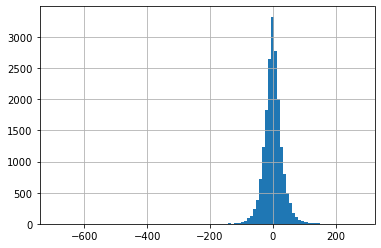

In [314]:
quater_weight_df(1,2)['Frequency_식품/생활_중가_증감율'].hist(bins = 100)

<AxesSubplot:>

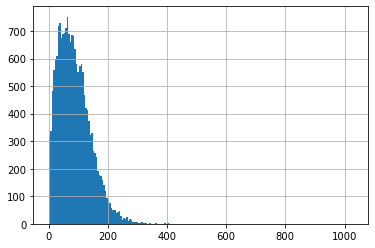

In [318]:
freq1['Frequency_식품/생활_중가'].hist(bins = 200)

<AxesSubplot:>

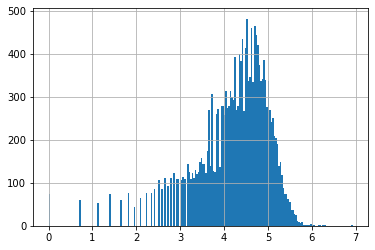

In [324]:
log_trans = np.log1p(freq1['Frequency_식품/생활_중가'])
log_trans.hist(bins = 200)

In [331]:
log_trans

CUSTNO
1       4.2057
2       4.8273
3       3.0748
4       4.3488
6       4.3621
         ...  
19333   4.4381
19334   4.6949
19335   3.9230
19336   1.8183
19337   1.6349
Name: Frequency_식품/생활_중가, Length: 18866, dtype: float64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

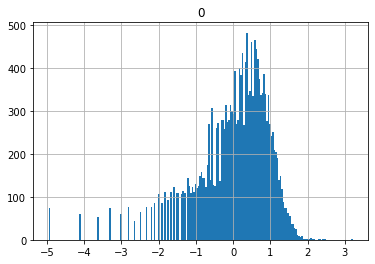

In [343]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

pd.DataFrame(scaler.fit_transform(np.array(log_trans).reshape(-1,1))).hist(bins = 200)

### 연도/분기/대대분류별/금액타입별 1일 평균 구매 횟수/평균 구매금액 구하기

In [61]:
import re

# 최근 구매일 - 구매 시작일: ex) 89 days
purdate_diff = recency_all[('PURDATE','max')].apply(lambda x: pd.to_datetime(x.astype(str))) - recency_all[('PURDATE','min')].apply(lambda x: pd.to_datetime(x.astype(str)))

# 최근 구매일 - 구매 시작일의 숫자만 추출: ex) 89
purdate_diff_int = purdate_diff.apply(lambda x: x.apply(lambda y: y.days))

# (최근 구매일 - 구매 시작일)/구매 횟수  => 해당 구매 기간 동안 1일 평균 구매 횟수
purdate_freq_mean = purdate_diff_int/recency_all[('PURDATE','count')]

# 총 구매 금액 /구매 횟수  => 구매 평균 금액
purchase_mean = recency_all[('PURAMT','sum')] / recency_all[('PURDATE','count')]
purchase_mean

PURYEAR          2014                                              \
QUARTER             1             2              3              4   
CUSTNO                                                              
1        75550.330579  92168.931624   75926.408451  109040.943925   
2        76757.989130  65804.903226  106771.079137   53643.333333   
3         2178.287770   2624.081340    2634.910569    2719.765517   
4        14082.182796  21087.361582   28640.117647   20955.172414   
6        11281.281250  16225.437500   17771.196629   15779.764706   
...               ...           ...            ...            ...   
19333     5523.693694   5376.400000    6424.555556    4256.542056   
19334     6318.553030   5444.501006    5203.288889    7943.290141   
19335     9870.884211   9434.311864    8467.536496    7978.558594   
19336    56200.000000  42588.076923   39504.625000   77452.500000   
19337     2360.000000   3427.142857    3125.487047    4529.644970   

PURYEAR           2015                                               
QUARTER              1              2              3              4  
CUSTNO                                                               
1         54087.122093   61395.571429  106939.452055   67896.641026  
2        127458.482759   80259.741379  109861.904762  100850.588235  
3          3210.459770    2353.157895    3028.899281    2775.279570  
4         14240.098361   13614.503546   18026.372881   15048.084112  
6         15271.029536   17311.381250   15430.236842   14629.630137  
...                ...            ...            ...            ...  
19333      6444.621212    6834.444444    5860.697674    5782.555556  
19334      7233.744681    4513.582353   15153.750000    9706.458333  
19335      7883.236559   12139.127660    7433.708134    8744.539130  
19336     45976.507937  109856.060606  123963.725490   97033.137255  
19337      3789.858156    3014.885845    4001.546053    4149.775281  

[18866 rows x 8 columns]